In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from matplotlib.ticker import ScalarFormatter
pd.set_option('display.max_columns', None)

In [128]:
df_raw = pd.read_csv("dropout_rate.csv", sep=";", encoding="utf-8-sig")

In [129]:
df_raw

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Mô tả

Bộ dữ liệu được tạo ra nhằm hỗ trợ giảm tỷ lệ bỏ học và thất bại học tập ở bậc đại học, thông qua việc ứng dụng các kỹ thuật học máy để xác định sinh viên có nguy cơ cao ngay từ giai đoạn đầu của quá trình học. Bộ dữ liệu tạo bởi nhóm Mónica V. Martins, Daniel Tolledo, Jorge Machado, Luís M. T. Baptista, and Valentim Realinho. 2021

In [130]:
df_raw.shape

(4424, 37)

In [131]:
df_raw.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

Số dòng: 4,424

Số cột: 36

Không có giá trị thiếu (ko null).

# Phân loại

## Qualitative
| Cột | Ý nghĩa |
|---|---|
| Marital Status | Tình trạng hôn nhân: 1 – độc thân, 2 – đã kết hôn, 3 – góa, 4 – ly hôn, 5 – ly thân hợp pháp |
| Application mode | Hình thức nộp hồ sơ (ví dụ: kỳ 1, diện đặc biệt, ưu tiên vùng...) |
| Application order | Mức độ ưu tiên của ngành khi đăng ký (0 là ưu tiên cao nhất) |
| Course | Mã ngành học (ví dụ: 33 - Công nghệ nhiên liệu sinh học, 171 - Đồ họa hoạt hình...) |
| Daytime/evening attendance | Thời gian học: 1 – ban ngày, 0 – buổi tối |
| Previous qualification | Trình độ học vấn trước đó |
| Nacionality | Quốc tịch (được mã hóa) |
| Mother's qualification | Trình độ học vấn của mẹ |
| Father's qualification | Trình độ học vấn của cha |
| Mother's occupation | Nghề nghiệp của mẹ |
| Father's occupation | Nghề nghiệp của cha |
| Displaced | Có phải sống xa nhà không: 1 - Có, 0 - Không |
| Educational special needs | Có nhu cầu giáo dục đặc biệt không: 1 - Có, 0 - Không |
| Debtor | Có nợ học phí không: 1 - Có, 0 - Không |
| Tuition fees up to date | Đã đóng đủ học phí chưa: 1 - Rồi, 0 - Chưa |
| Gender | Giới tính: 1 - Nam, 0 - Nữ |
| Scholarship holder | Có học bổng không: 1 - Có, 0 - Không |
| International | Sinh viên quốc tế: 1 - Có, 0 - Không |
| Target | Kết quả học tập: "Graduate" (tốt nghiệp), "Dropout" (bỏ học), ... |

## Quantitative 

### Discrete

| Cột | Ý nghĩa |
|---|---|
| Age at enrollment | Tuổi khi nhập học |
| Curricular units 1st sem (credited) | Số học phần kỳ 1 được miễn/chuyển điểm |
| Curricular units 1st sem (enrolled) | Số học phần kỳ 1 đã đăng ký |
| Curricular units 1st sem (evaluations) | Số học phần kỳ 1 đã tham gia đánh giá |
| Curricular units 1st sem (approved) | Số học phần kỳ 1 đã qua môn |
| Curricular units 1st sem (without evaluations) | Số học phần kỳ 1 không có điểm đánh giá |
| Curricular units 2nd sem (credited) | Số học phần kỳ 2 được miễn/chuyển điểm |
| Curricular units 2nd sem (enrolled) | Số học phần kỳ 2 đã đăng ký |
| Curricular units 2nd sem (evaluations) | Số học phần kỳ 2 đã tham gia đánh giá |
| Curricular units 2nd sem (approved) | Số học phần kỳ 2 đã qua môn |
| Curricular units 2nd sem (without evaluations) | Số học phần kỳ 2 không có điểm đánh giá |

### Continuous

| Cột | Ý nghĩa |
|---|---|
| Previous qualification (grade) | Điểm số bằng cấp trước đó |
| Admission grade | Điểm đầu vào |
| Curricular units 1st sem (grade) | Điểm trung bình kỳ 1 |
| Curricular units 2nd sem (grade) | Điểm trung bình kỳ 2 |
| Unemployment rate | Tỉ lệ thất nghiệp tại thời điểm đó |
| Inflation rate | Tỉ lệ lạm phát tại thời điểm đó |
| GDP | Tổng sản phẩm quốc nội tại thời điểm đó |


In [132]:
df = df_raw.copy()

summary_stats = {
    "Thông số thống kê": [
        "Mean",
        "Min",
        "25th Percentile",
        "Median",
        "75th Percentile",
        "Max",
        "Mode",
        "Variance",
        "Standard Deviation",
        "Coefficient of Variation"
    ]
}

quantitative_cols = [
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (without evaluations)",
    "Previous qualification (grade)",
    "Admission grade",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]

def create_summary_df(df, quantitative_cols):
    for col in quantitative_cols:
        data = df[col]
        mean_val = data.mean()
        std_val = data.std()
        mode_val = data.mode().iloc[0] if not data.mode().empty else np.nan
        variance_val = data.var()
        cv_val = std_val / mean_val if mean_val != 0 else np.nan

        summary_stats[col] = [
            mean_val,
            data.min(),
            data.quantile(0.25),
            data.median(),
            data.quantile(0.75),
            data.max(),
            mode_val,
            variance_val,
            std_val,
            cv_val
        ]

    formatted_summary_df = pd.DataFrame(summary_stats).copy()

    for col in formatted_summary_df.columns[1:]:  # Skip "Thông số thống kê"
        formatted_summary_df[col] = formatted_summary_df[col].apply(lambda x: f'{x:,.4f}' if isinstance(x, (int, float)) else x)

    return formatted_summary_df

formatted_summary_df = create_summary_df(df, quantitative_cols)
formatted_summary_df

,Thông số thống kê,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
0,Mean,23.2651,0.7100,6.2706,8.2991,4.7066,0.1377,0.5418,6.2321,8.0633,4.4358,0.1503,132.6133,126.9781,10.6408,10.2302,11.5661,1.2280,0.0020
1,Min,17.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,95.0000,95.0000,0.0000,0.0000,7.6000,-0.8000,-4.0600
2,25th Percentile,19.0000,0.0000,5.0000,6.0000,3.0000,0.0000,0.0000,5.0000,6.0000,2.0000,0.0000,125.0000,117.9000,11.0000,10.7500,9.4000,0.3000,-1.7000
3,Median,20.0000,0.0000,6.0000,8.0000,5.0000,0.0000,0.0000,6.0000,8.0000,5.0000,0.0000,133.1000,126.1000,12.2857,12.2000,11.1000,1.4000,0.3200
4,75th Percentile,25.0000,0.0000,7.0000,10.0000,6.0000,0.0000,0.0000,7.0000,10.0000,6.0000,0.0000,140.0000,134.8000,13.4000,13.3333,13.9000,2.6000,1.7900
5,Max,70.0000,20.0000,26.0000,45.0000,26.0000,12.0000,19.0000,23.0000,33.0000,20.0000,12.0000,190.0000,190.0000,18.8750,18.5714,16.2000,3.7000,3.5100
6,Mode,18.0000,0.0000,6.0000,8.0000,6.0000,0.0000,0.0000,6.0000,8.0000,6.0000,0.0000,133.1000,130.0000,0.0000,0.0000,7.6000,1.4000,0.3200
7,Variance,57.5749,5.5720,6.1513,17.4649,9.5743,0.4773,3.6808,4.8222,15.5863,9.0888,0.5682,173.9321,209.7283,23.4611,27.1525,7.0961,1.9119,5.1526
8,Standard Deviation,7.5878,2.3605,2.4802,4.1791,3.0942,0.6909,1.9185,2.1960,3.9480,3.0148,0.7538,13.1883,14.4820,4.8437,5.2108,2.6639,1.3827,2.2699
9,Coefficient of Variation,0.3261,3.3247,0.3955,0.5036,0.6574,5.0188,3.5409,0.3524,0.4896,0.6796,5.0146,0.0994,0.1141,0.4552,0.5094,0.2303,1.1260,"1,152.9500"


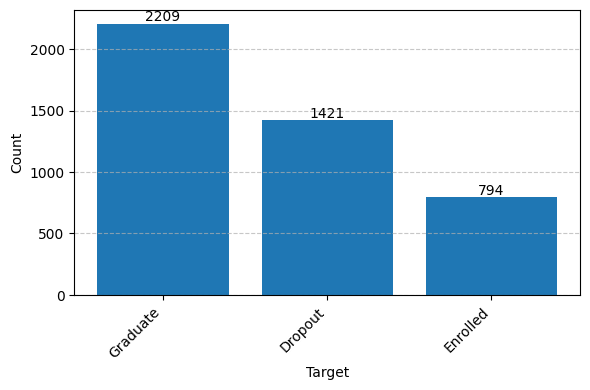

In [133]:
def plot_categorical_distribution_grid(df_raw, columns, cols=2):
    rows = (len(columns) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))

    # Ensure axes is always a flat array
    if isinstance(axes, plt.Axes):
        axes = np.array([axes])
    else:
        axes = np.array(axes).flatten()

    for i, col in enumerate(columns):
        ax = axes[i]
        counts = df_raw[col].value_counts()
        bars = ax.bar(counts.index, counts.values)

        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height,
                    f'{int(height)}', ha='center', va='bottom', fontsize=10)

        ax.set_xlabel(col)
        ax.set_ylabel("Count")
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.set_xticks(range(len(counts.index)))
        ax.set_xticklabels(counts.index, rotation=45, ha='right')

    # Remove any unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_categorical_distribution_grid(df_raw, ['Target', ], cols=1)

Biểu đồ cho thấy phân bổ dữ liệu không đều giữa ba nhóm Target, với số lượng sinh viên tốt nghiệp (Graduate) chiếm tỷ lệ lớn nhất (~50%), tiếp theo là nhóm bỏ học (Dropout, ~32%), và nhóm đang học (Enrolled) chiếm tỷ lệ thấp nhất (~18%). Áp dụng mô hình phân loại, cần cân nhắc sử dụng các kỹ thuật như resampling (oversampling nhóm thiểu số hoặc undersampling nhóm chiếm đa số), hoặc sử dụng trọng số lớp (class weights) để đảm bảo mô hình không bỏ qua các nhóm quan trọng như Dropout.

In [134]:
# Số môn đã qua - Năm
df_raw['Curricular units Year'] = df_raw['Curricular units 1st sem (approved)'] + df_raw['Curricular units 2nd sem (approved)']

<Axes: xlabel='Curricular units Year', ylabel='Count'>

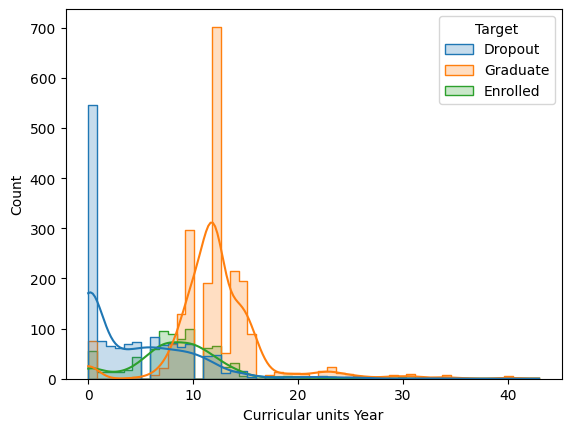

In [135]:
sns.histplot(data=df_raw, x='Curricular units Year', hue='Target', kde=True, element="step")

Biểu đồ thể hiện phân phối của tổng số học phần đã hoàn thành trong năm học (Curricular units Year) theo ba nhóm mục tiêu: Dropout, Graduate và Enrolled. Dễ dàng nhận thấy rằng sinh viên thuộc nhóm Dropout chủ yếu tập trung ở mức rất thấp, nhiều người thậm chí không hoàn thành học phần nào hoặc chỉ hoàn thành từ một đến vài học phần, cho thấy họ bỏ học khá sớm. Ngược lại, sinh viên tốt nghiệp (Graduate) có xu hướng hoàn thành đầy đủ số học phần trong năm, với đỉnh phân phối nằm quanh mức 10 đến 12 học phần, phản ánh một quá trình học tập ổn định và đều đặn. Trong khi đó, nhóm Enrolled có phân phối trải rộng hơn, dao động từ thấp đến cao, phù hợp với thực tế rằng nhóm này bao gồm sinh viên đang theo học ở nhiều giai đoạn khác nhau, từ đầu đến cuối chương trình. Tổng thể, biểu đồ cho thấy số lượng học phần hoàn thành trong năm là một đặc trưng có khả năng phân tách rõ giữa các nhóm mục tiêu.

<Axes: xlabel='Target', ylabel='Curricular units Year'>

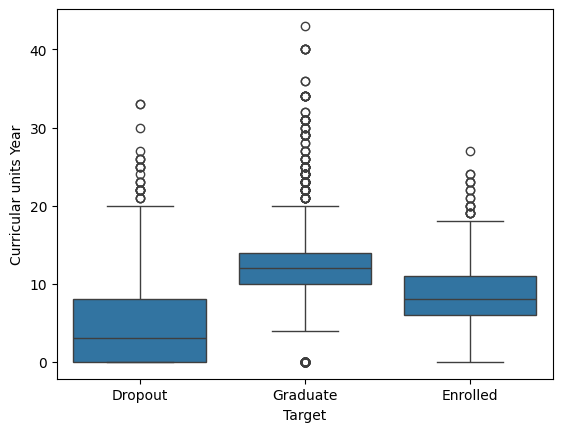

In [136]:
sns.boxplot(x='Target', y='Curricular units Year', data=df_raw)

Biểu đồ boxplot này mô tả sự phân bố tổng số học phần đã hoàn thành trong năm (Curricular units Year) theo từng nhóm mục tiêu: Dropout, Graduate, và Enrolled. Nhìn chung, sinh viên thuộc nhóm Graduate có giá trị trung vị cao nhất, cho thấy họ thường hoàn thành nhiều học phần hơn so với hai nhóm còn lại. Nhóm Dropout có trung vị thấp nhất và phần lớn dữ liệu nằm ở vùng thấp, thể hiện rằng những sinh viên bỏ học thường hoàn thành rất ít học phần trong năm. Trong khi đó, nhóm Enrolled có trung vị nằm giữa hai nhóm còn lại, phản ánh sự đa dạng về tiến độ học tập của sinh viên đang theo học.

Ngoài ra, cả ba nhóm đều có nhiều điểm ngoại lệ (outliers), đặc biệt là nhóm Graduate với nhiều giá trị vượt xa mức 20 học phần. Điều này cho thấy một số sinh viên có thể đăng ký và hoàn thành số học phần vượt mức bình thường, có thể do học vượt hoặc có chương trình học đặc biệt. Biểu đồ này tiếp tục củng cố nhận định rằng tổng số học phần trong năm là một yếu tố quan trọng giúp phân biệt hành vi học tập giữa các nhóm sinh viên.

In [137]:
# Điểm tích lũy - Năm
df_raw['Curricular grade Year'] = df_raw['Curricular units 1st sem (grade)'] + df_raw['Curricular units 2nd sem (grade)']

<Axes: xlabel='Curricular grade Year', ylabel='Count'>

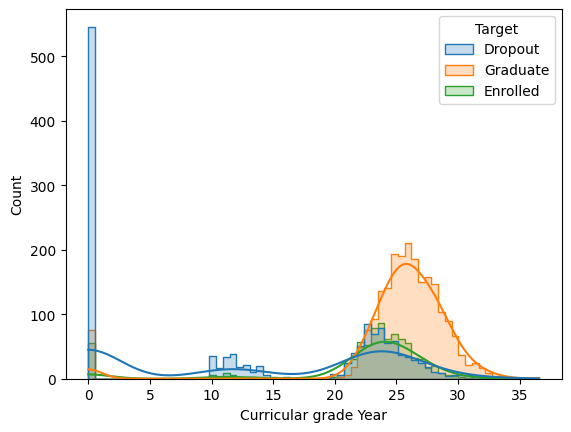

In [138]:
sns.histplot(data=df_raw, x='Curricular grade Year', hue='Target', kde=True, element="step")

Biểu đồ thể hiện phân phối tổng điểm học phần trong năm học (Curricular grade Year) theo ba nhóm sinh viên: Dropout, Graduate và Enrolled. Nhóm Graduate có phân phối tập trung và đối xứng quanh khoảng 24–28 điểm, cho thấy phần lớn sinh viên tốt nghiệp đạt kết quả học tập tốt, ổn định và nhất quán. Trong khi đó, nhóm Dropout có đặc điểm nổi bật là một lượng lớn sinh viên có tổng điểm bằng 0, thể hiện rõ rệt qua đỉnh nhọn tại giá trị 0 – điều này nhiều khả năng phản ánh việc họ không hoàn thành hoặc không tham gia học tập trong năm học đó.

Ngược lại, nhóm Enrolled có phân phối trải rộng hơn, với phần lớn sinh viên đạt tổng điểm trong khoảng 20–28 điểm, nhưng vẫn có một số phân bố ở mức thấp hơn, phản ánh sự đa dạng trong quá trình học tập khi còn đang theo học. Biểu đồ này cho thấy tổng điểm học phần trong năm là một đặc trưng có giá trị, giúp phân biệt rõ giữa sinh viên bỏ học và sinh viên tốt nghiệp. Nhìn chung, điểm số không chỉ phản ánh năng lực học tập mà còn liên quan chặt chẽ đến khả năng hoàn thành chương trình đào tạo.

<Axes: xlabel='Target', ylabel='Curricular grade Year'>

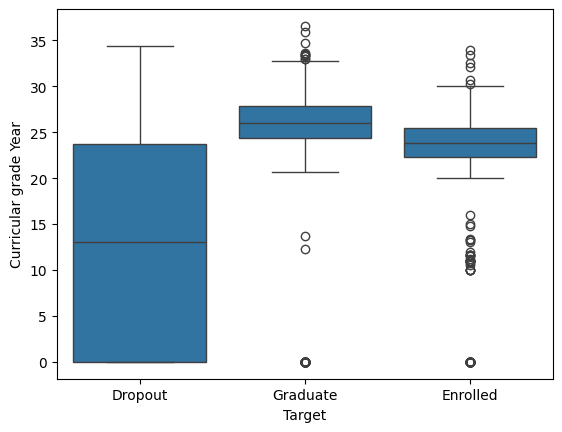

In [139]:
sns.boxplot(x='Target', y='Curricular grade Year', data=df_raw)

Biểu đồ boxplot thể hiện phân phối tổng điểm học phần trong năm học (Curricular grade Year) theo ba nhóm sinh viên: Dropout, Graduate và Enrolled. Nhóm Graduate có giá trị trung vị cao nhất, dao động chủ yếu trong khoảng 25–30 điểm, phản ánh rằng sinh viên tốt nghiệp thường đạt kết quả học tập tốt và ổn định. Nhóm Enrolled có trung vị thấp hơn một chút nhưng vẫn khá gần với nhóm Graduate, cho thấy phần lớn sinh viên đang theo học cũng đạt kết quả học tập khá, mặc dù có nhiều điểm ngoại lệ ở mức điểm thấp – có thể là sinh viên năm đầu hoặc đang gặp khó khăn trong học tập.

Trong khi đó, nhóm Dropout có sự phân tán lớn với trung vị nằm thấp hơn hẳn hai nhóm còn lại, khoảng 12–13 điểm, đồng thời xuất hiện nhiều giá trị rất thấp, thậm chí bằng 0. Điều này cho thấy nhiều sinh viên bỏ học đạt kết quả học tập kém hoặc gần như không tích lũy được điểm số nào trong năm học, là dấu hiệu cảnh báo sớm cho nguy cơ bỏ học. Biểu đồ này một lần nữa khẳng định mối liên hệ chặt chẽ giữa thành tích học tập và khả năng hoàn thành chương trình đào tạo.

<Axes: xlabel='Age at enrollment', ylabel='Count'>

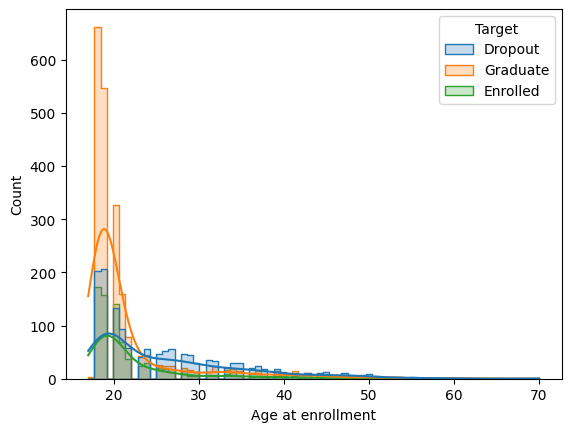

In [140]:
sns.histplot(data=df_raw, x='Age at enrollment', hue='Target', kde=True, element="step")

Biểu đồ thể hiện phân phối độ tuổi nhập học (Age at enrollment) của sinh viên theo ba nhóm mục tiêu: Dropout, Graduate, và Enrolled. Trong đó, nhóm Graduate có độ tuổi nhập học tập trung mạnh ở khoảng 18–20 tuổi, với đỉnh rõ rệt ở tuổi 18. Điều này cho thấy phần lớn sinh viên tốt nghiệp bắt đầu chương trình học đúng độ tuổi truyền thống, ngay sau khi tốt nghiệp phổ thông.

Ngược lại, nhóm Dropout có phân phối trải rộng hơn, với nhiều sinh viên bắt đầu học ở độ tuổi lớn hơn, thậm chí kéo dài đến trên 50 tuổi. Mặc dù nhóm này cũng có đỉnh ở tuổi 18–20, nhưng mật độ thấp hơn so với nhóm Graduate và có nhiều giá trị rải rác ở các độ tuổi lớn hơn. Điều này gợi ý rằng sinh viên bắt đầu học muộn hơn có xu hướng bỏ học cao hơn, có thể do khó khăn trong việc cân bằng học tập với các trách nhiệm khác như gia đình hoặc công việc.

Nhóm Enrolled cũng có xu hướng tập trung ở tuổi 18–21, tương tự như nhóm Graduate, nhưng phân phối vẫn rộng hơn một chút, phản ánh tính đa dạng về độ tuổi của sinh viên đang theo học. Tóm lại, biểu đồ này cho thấy độ tuổi nhập học là một yếu tố có thể liên quan đến khả năng hoàn thành chương trình học, với xu hướng tốt nghiệp cao hơn ở những sinh viên nhập học ở độ tuổi trẻ.

<Axes: xlabel='Target', ylabel='Age at enrollment'>

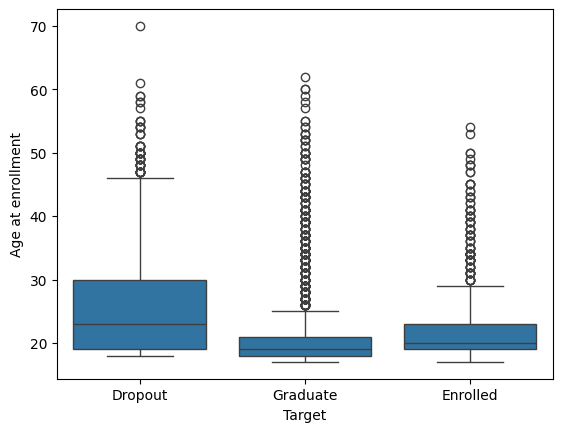

In [141]:
sns.boxplot(x='Target', y='Age at enrollment', data=df_raw)

Biểu đồ Boxplot thể hiện phân bố độ tuổi khi nhập học theo ba nhóm sinh viên: Dropout (bỏ học), Graduate (tốt nghiệp) và Enrolled (đang học). Từ biểu đồ, có thể nhận thấy sự khác biệt rõ rệt giữa các nhóm, đặc biệt là về độ tuổi trung vị và mức độ phân tán.

Nhóm Dropout có độ tuổi nhập học cao hơn đáng kể so với hai nhóm còn lại. Trung vị của nhóm này rơi vào khoảng 24 tuổi, và dữ liệu có độ phân tán lớn, với nhiều điểm ngoại lệ lên tới 60 hoặc thậm chí 70 tuổi. Điều này cho thấy rằng sinh viên lớn tuổi hơn có xu hướng bỏ học cao hơn, có thể do các yếu tố như áp lực tài chính, gia đình, công việc hoặc khó khăn trong việc quay lại môi trường học tập sau thời gian gián đoạn.

Ngược lại, nhóm Graduate và Enrolled có độ tuổi nhập học thấp và tương đối ổn định, chủ yếu tập trung trong khoảng từ 18 đến 22 tuổi. Trung vị của hai nhóm này gần như trùng nhau, cho thấy phần lớn sinh viên tốt nghiệp hoặc đang tiếp tục học đều là những người nhập học ngay sau khi hoàn thành bậc phổ thông.

In [142]:
df_raw['Curricular units failed Year'] = df_raw['Curricular units 1st sem (enrolled)'] + df_raw['Curricular units 2nd sem (enrolled)'] - df_raw['Curricular units Year']

<Axes: xlabel='Curricular units failed Year', ylabel='Count'>

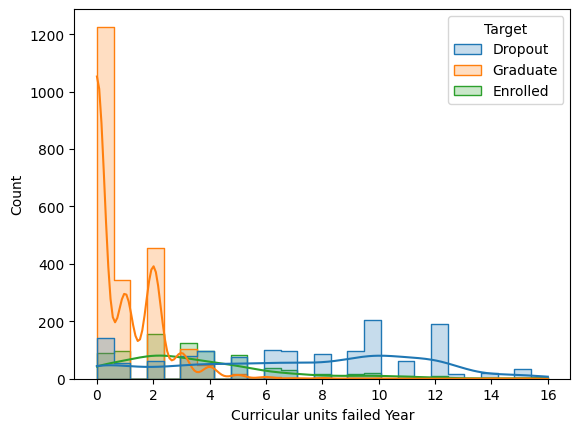

In [143]:
sns.histplot(data=df_raw, x='Curricular units failed Year', hue='Target', kde=True, element="step")


Biểu đồ cho thấy sinh viên tốt nghiệp hầu như không trượt hoặc chỉ trượt rất ít học phần trong năm, với phần lớn tập trung tại giá trị 0–1. Ngược lại, sinh viên bỏ học có số học phần bị trượt trải rộng, nhiều trường hợp trượt trên 5 học phần, cho thấy kết quả học tập yếu kém là yếu tố liên quan trực tiếp đến nguy cơ bỏ học. Nhóm đang theo học nằm giữa hai nhóm còn lại, phản ánh sự đa dạng về năng lực và tiến độ học tập.

<Axes: xlabel='Target', ylabel='Curricular units failed Year'>

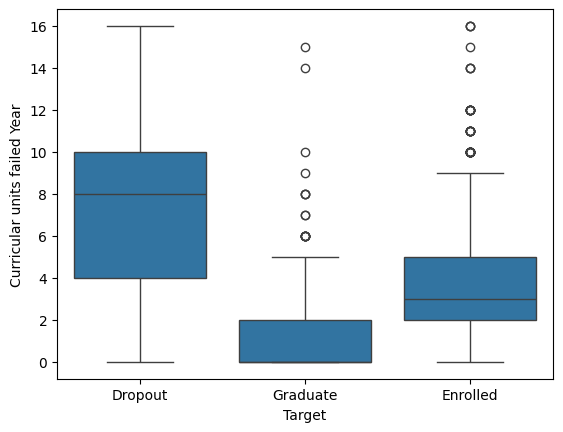

In [144]:
sns.boxplot(x='Target', y='Curricular units failed Year', data=df_raw)

Biểu đồ boxplot cho thấy sinh viên tốt nghiệp thường trượt rất ít học phần trong năm, với trung vị gần bằng 1, trong khi nhóm bỏ học có số học phần trượt cao hơn hẳn, trung vị khoảng 8, và phân bố rộng. Nhóm đang theo học nằm giữa, phản ánh sự phân tán về năng lực học tập. Số học phần bị trượt rõ ràng là một chỉ báo quan trọng liên quan đến nguy cơ bỏ học.

<Axes: xlabel='Target', ylabel='Admission grade'>

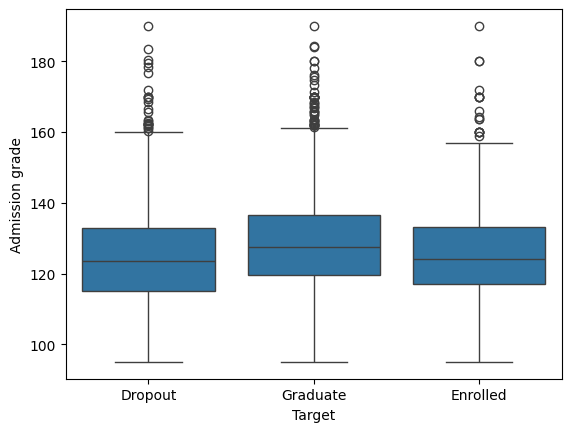

In [145]:
sns.boxplot(x='Target', y='Admission grade', data=df_raw)

<Axes: xlabel='Target', ylabel='Unemployment rate'>

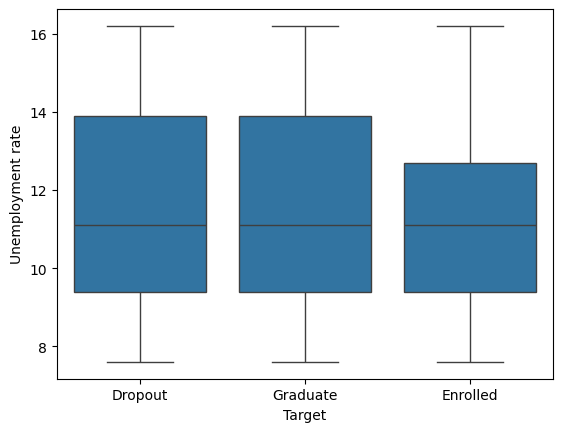

In [146]:
sns.boxplot(x='Target', y='Unemployment rate', data=df_raw)


<Axes: xlabel='Target', ylabel='Inflation rate'>

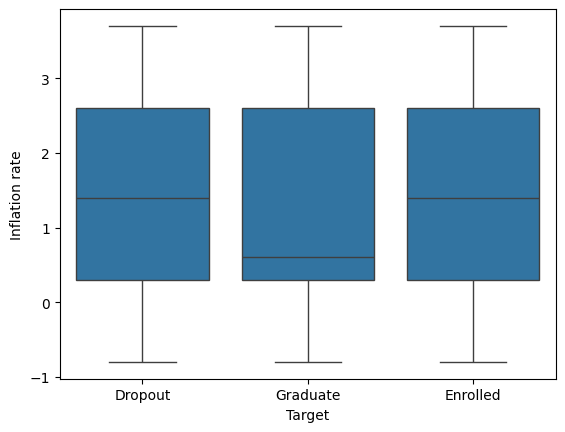

In [147]:
sns.boxplot(x='Target', y='Inflation rate', data=df_raw)

<Axes: xlabel='Target', ylabel='GDP'>

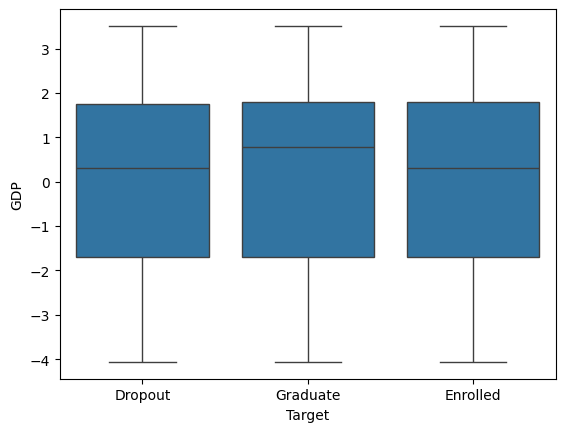

In [148]:
sns.boxplot(x='Target', y='GDP', data=df_raw)

Không có sự khác biệt đáng kể giữa các nhãn target ở các biểu đồ này

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17168\3847291024.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cramér's V", y=cramer_df.index, data=cramer_df, palette="viridis")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17168\3847291024.py:35: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


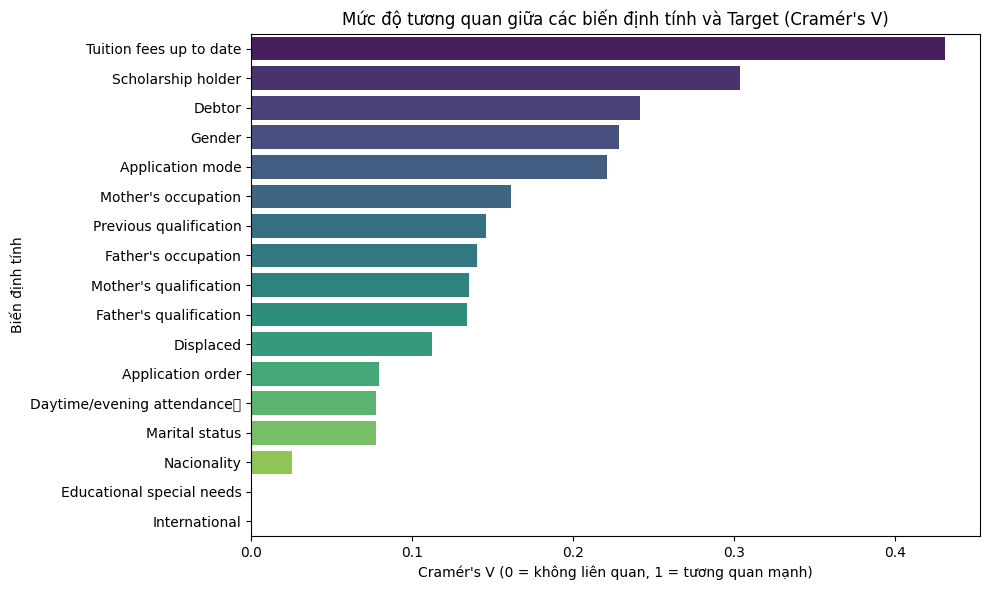

In [149]:
from scipy import stats

qual_cols = [
    'Marital status', 'Application mode', 'Application order',
    'Daytime/evening attendance\t', 'Previous qualification', 'Nacionality',
    "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation", 'Displaced',
    'Educational special needs', 'Debtor', 'Tuition fees up to date',
    'Gender', 'Scholarship holder', 'International'
]

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramer_results = {}
for col in qual_cols:
    cramer_results[col] = cramers_v(df_raw[col], df_raw['Target'])

cramer_df = pd.DataFrame.from_dict(cramer_results, orient='index', columns=["Cramér's V"])
cramer_df = cramer_df.sort_values(by="Cramér's V", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Cramér's V", y=cramer_df.index, data=cramer_df, palette="viridis")
plt.title("Mức độ tương quan giữa các biến định tính và Target (Cramér's V)")
plt.xlabel("Cramér's V (0 = không liên quan, 1 = tương quan mạnh)")
plt.ylabel("Biến định tính")
plt.tight_layout()
plt.show()

https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V

Biểu đồ cho thấy một số biến định tính có mối liên hệ đáng kể với biến mục tiêu Target. Đáng chú ý nhất là biến Tuition fees up to date, có hệ số Cramér's V cao nhất (~0.43), cho thấy việc đóng học phí đúng hạn có liên quan mạnh đến khả năng tốt nghiệp hay bỏ học. Tiếp theo là các biến Scholarship holder, Debtor, và Gender, cũng có mức tương quan khá rõ rệt (Cramér's V từ ~0.22–0.28), phản ánh rằng các yếu tố tài chính và giới tính có thể ảnh hưởng đáng kể đến kết quả học tập của sinh viên. Những biến như Nationality, Educational special needs, và International có mức tương quan rất thấp, gần như không có mối liên hệ rõ ràng với kết quả học tập.

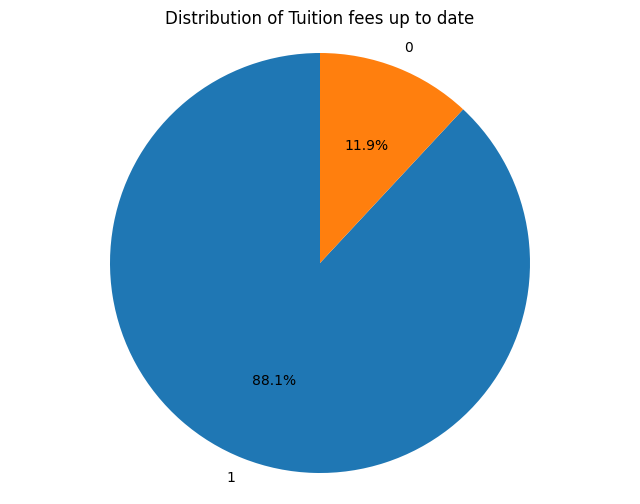

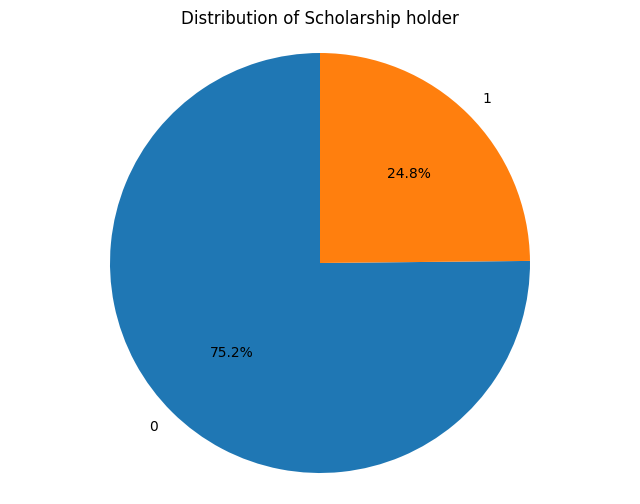

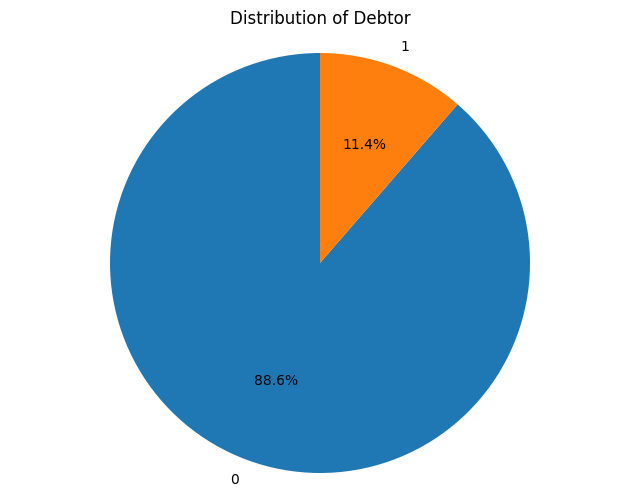

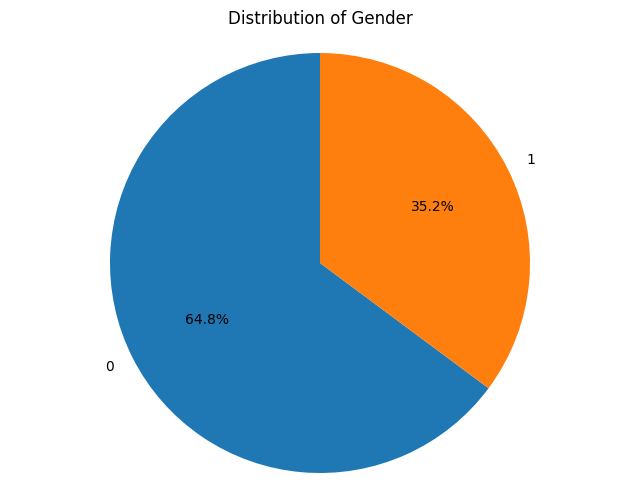

In [150]:

piechart_cols = [
    "Tuition fees up to date",
    "Scholarship holder",
    "Debtor",
    "Gender",
    # "Application mode",
]

for col in piechart_cols:
    counts = df_raw[col].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

Các biểu đồ tròn cho thấy dữ liệu có sự mất cân đối rõ rệt ở hầu hết các đặc trưng:

Tuition fees up to date và Debtor đều nghiêng mạnh về một phía, với hơn 88% sinh viên đã đóng đủ học phí và không nợ phí, cho thấy phân phối lệch mạnh và mất cân đối giữa hai giá trị 0 và 1.

Scholarship holder cũng bị lệch, với chỉ 24.8% sinh viên nhận học bổng, phản ánh tình trạng phân bố không đều giữa người có và không có học bổng.

Gender tuy có sự chênh lệch (nam chiếm 64.8%), nhưng là đặc trưng có phân phối ít lệch hơn so với các biến còn lại.

Hầu hết các biến dạng nhị phân đều có phân phối mất cân bằng, điều này cần được lưu ý nếu sử dụng các biến này trong mô hình dự đoán để tránh hiện tượng học lệch (bias).

In [151]:
def plot_heatmap_by_target(df, col1, col2, normalize='index'):
    ct = pd.crosstab(df[col1], df[col2], normalize=normalize)
    plt.figure(figsize=(7, 4))
    sns.heatmap(
        ct,
        annot=True,
        fmt=".2f",
        cmap="YlGnBu",
        cbar_kws={'label': 'Tỷ lệ' if normalize else 'Số lượng'}
    )
    plt.title(f"Heatmap: {col1} vs {col2}")
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.tight_layout()
    plt.show()

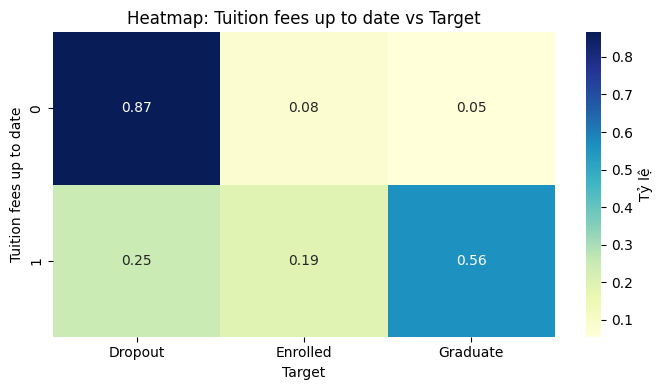

In [152]:
plot_heatmap_by_target(df_raw, 'Tuition fees up to date', 'Target')

Biểu đồ heatmap cho thấy sinh viên chưa đóng học phí có tỷ lệ bỏ học rất cao (87%), trong khi chỉ 5% trong nhóm này tốt nghiệp. Điều này cho thấy việc đóng học phí đúng hạn có mối liên hệ chặt chẽ với khả năng hoàn thành chương trình học.

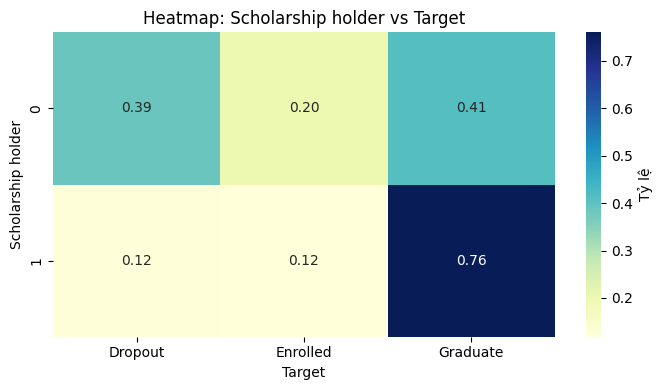

In [153]:
plot_heatmap_by_target(df_raw, 'Scholarship holder', 'Target')

Biểu đồ cho thấy sinh viên có học bổng có tỷ lệ tốt nghiệp rất cao (76%) và tỷ lệ bỏ học thấp (12%). Trong khi đó, sinh viên không có học bổng có tỷ lệ tốt nghiệp và bỏ học gần như ngang nhau (41% và 39%). Điều này gợi ý rằng học bổng có thể là yếu tố hỗ trợ tích cực giúp sinh viên duy trì và hoàn thành chương trình học.


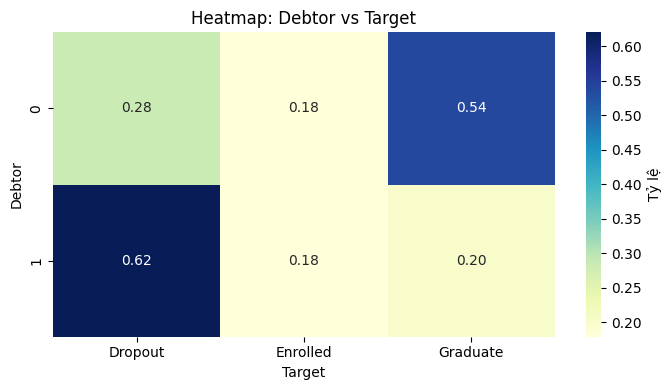

In [154]:
plot_heatmap_by_target(df_raw, 'Debtor', 'Target')

Biểu đồ heatmap cho thấy sinh viên có nợ (Debtor = 1) có tỷ lệ bỏ học cao (62%) và tỷ lệ tốt nghiệp thấp (20%). Ngược lại, sinh viên không có nợ có tỷ lệ tốt nghiệp cao hơn (54%) và tỷ lệ bỏ học thấp hơn (28%). Điều này cho thấy tình trạng tài chính, thể hiện qua việc nợ học phí, có thể là một yếu tố quan trọng ảnh hưởng đến khả năng hoàn thành chương trình học.


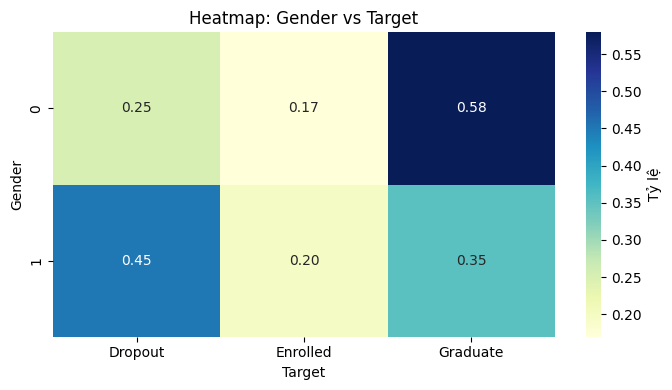

In [155]:
plot_heatmap_by_target(df_raw, 'Gender', 'Target')

Mức độ chênh lệch không quá lớn và có thể bị ảnh hưởng bởi các yếu tố khác, nên không đủ mạnh để kết luận có tương quan rõ rệt. Đây là một dạng phân bố lệch nhẹ

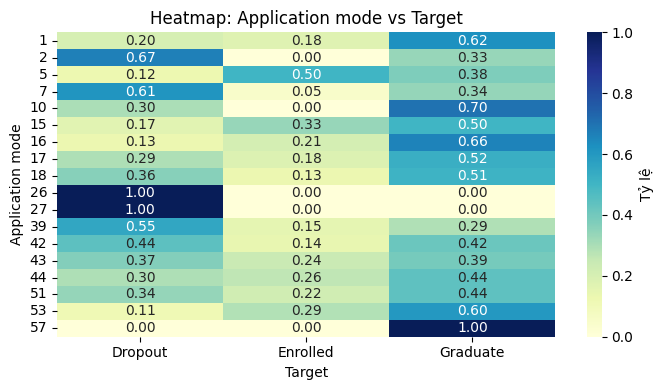

In [156]:
plot_heatmap_by_target(df_raw, 'Application mode', 'Target')

Biểu đồ heatmap cho thấy Application mode (phương thức đăng ký tuyển sinh) có ảnh hưởng đáng kể đến kết quả học tập. Một số mã mode như 27, 26, 7, 2 có tỷ lệ bỏ học cực cao (100% hoặc gần 70%), trong khi các mã như 57, 53, 10 lại có tỷ lệ tốt nghiệp rất cao (trên 60%, thậm chí 100%). Điều này cho thấy cách thức nộp đơn đầu vào có thể phản ánh phần nào mức độ sẵn sàng hoặc phù hợp của sinh viên với chương trình học, và nên được cân nhắc kỹ trong quá trình tuyển sinh và hỗ trợ.


## Data transformer

### MinMaxScaler

In [157]:
# create a copy of df_raw and apply MinMaxScaler to quantitative columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

quantitative_cols = quantitative_cols + [
    'Curricular units Year',
    'Curricular grade Year',
    'Curricular units failed Year',
]

df_minmax = df_raw[quantitative_cols + ['Target']].copy()

df_minmax[quantitative_cols] = scaler.fit_transform(df_minmax[quantitative_cols])

df_minmax

,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Curricular units Year,Curricular grade Year,Curricular units failed Year,Target
0,0.056604,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.284211,0.340000,0.000000,0.000000,0.372093,0.488889,0.766182,0.000000,0.000000,0.0000,Dropout
1,0.037736,0.0,0.230769,0.133333,0.230769,0.0,0.0,0.260870,0.181818,0.30,0.0,0.684211,0.500000,0.741722,0.735897,0.732558,0.111111,0.640687,0.279070,0.756596,0.0000,Graduate
2,0.037736,0.0,0.230769,0.000000,0.000000,0.0,0.0,0.260870,0.000000,0.00,0.0,0.284211,0.313684,0.000000,0.000000,0.372093,0.488889,0.766182,0.000000,0.000000,0.7500,Dropout
3,0.056604,0.0,0.230769,0.177778,0.230769,0.0,0.0,0.260870,0.303030,0.25,0.0,0.284211,0.258947,0.711447,0.667692,0.209302,0.000000,0.124174,0.255814,0.706330,0.0625,Graduate
4,0.528302,0.0,0.230769,0.200000,0.192308,0.0,0.0,0.260870,0.181818,0.30,0.0,0.052632,0.489474,0.653422,0.700000,0.732558,0.111111,0.640687,0.255814,0.692786,0.0625,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.037736,0.0,0.230769,0.155556,0.192308,0.0,0.0,0.260870,0.242424,0.25,0.0,0.315789,0.286316,0.720530,0.682051,0.918605,0.800000,0.000000,0.232558,0.718310,0.1250,Graduate
4420,0.018868,0.0,0.230769,0.133333,0.230769,0.0,0.0,0.260870,0.181818,0.10,0.0,0.263158,0.252632,0.635762,0.592308,0.406977,0.311111,0.803170,0.186047,0.628977,0.2500,Dropout
4421,0.245283,0.0,0.269231,0.177778,0.269231,0.0,0.0,0.347826,0.272727,0.05,0.0,0.621053,0.573684,0.790066,0.726923,0.732558,0.111111,0.640687,0.186047,0.776992,0.4375,Dropout
4422,0.056604,0.0,0.192308,0.111111,0.192308,0.0,0.0,0.217391,0.181818,0.25,0.0,0.894737,0.618947,0.731126,0.646154,0.209302,0.000000,0.124174,0.232558,0.705548,0.0000,Graduate


In [158]:
boxplot_cols = [
    'Curricular units Year',
    'Curricular grade Year',
    'Curricular units failed Year',
    'Age at enrollment',
    'Admission grade',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
]

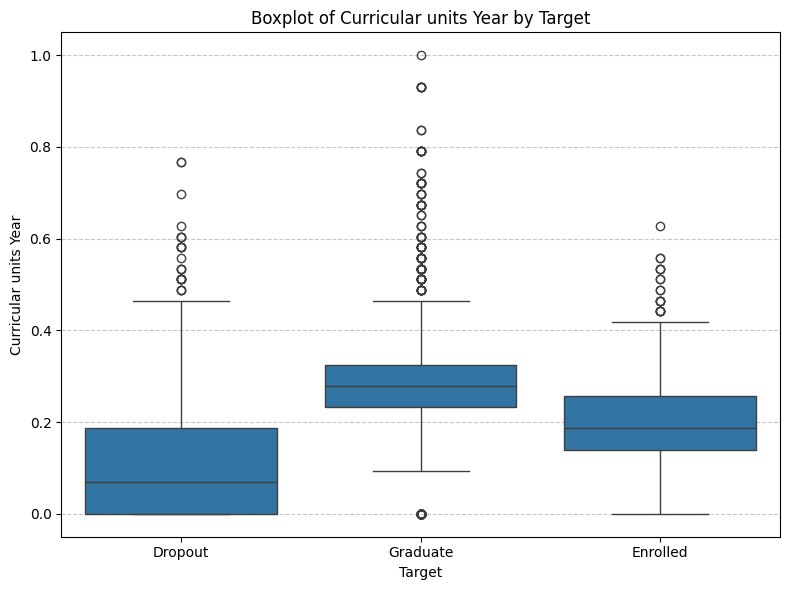

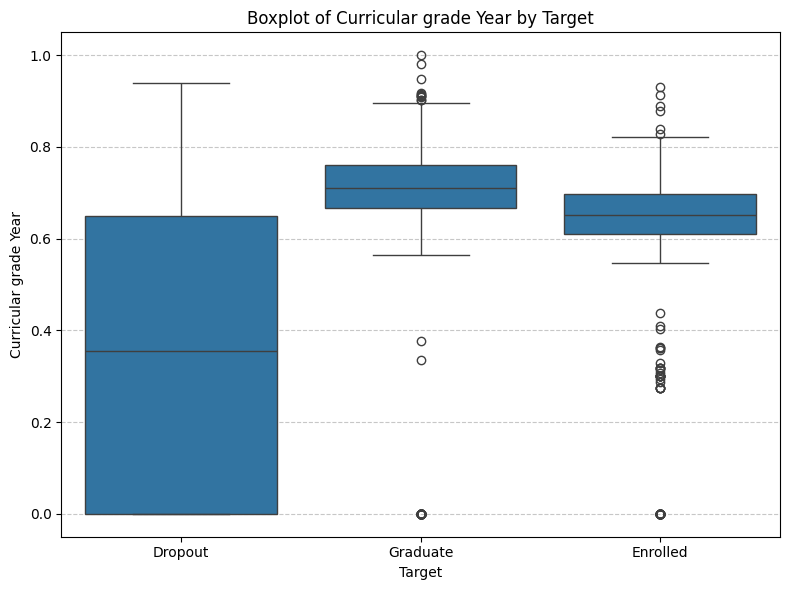

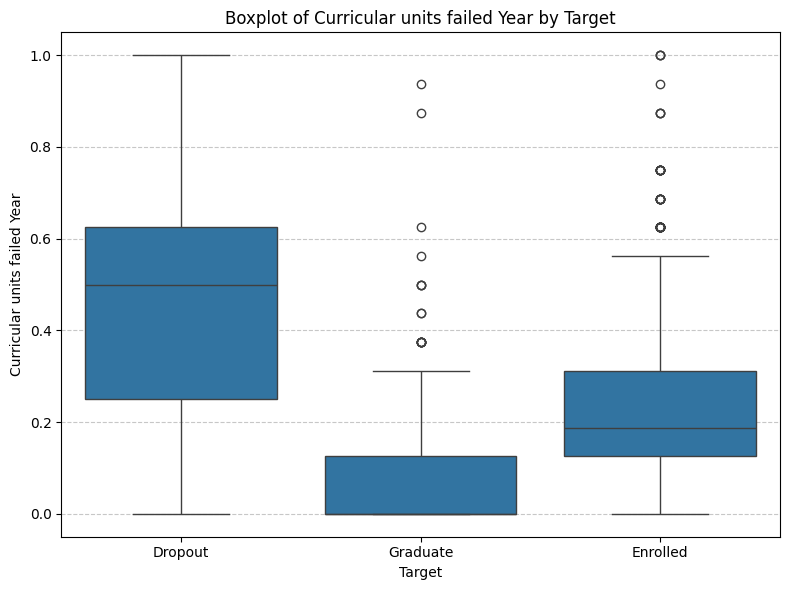

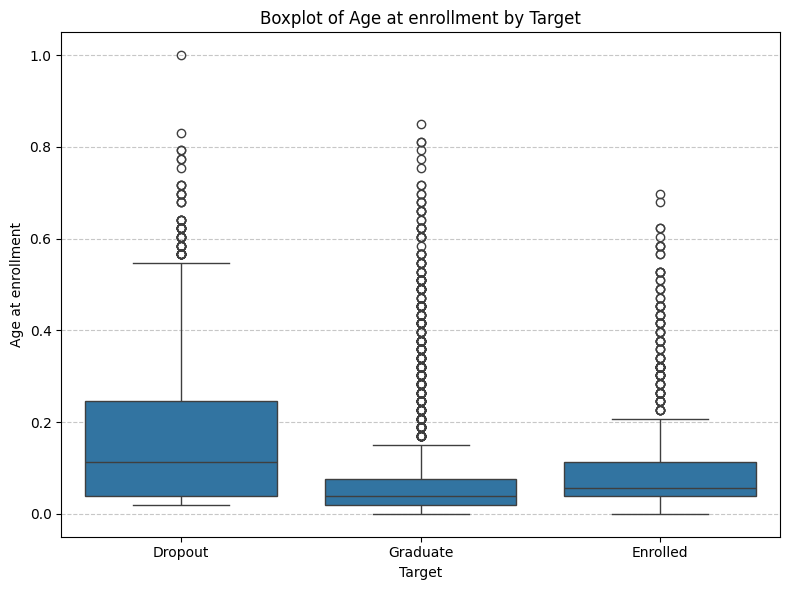

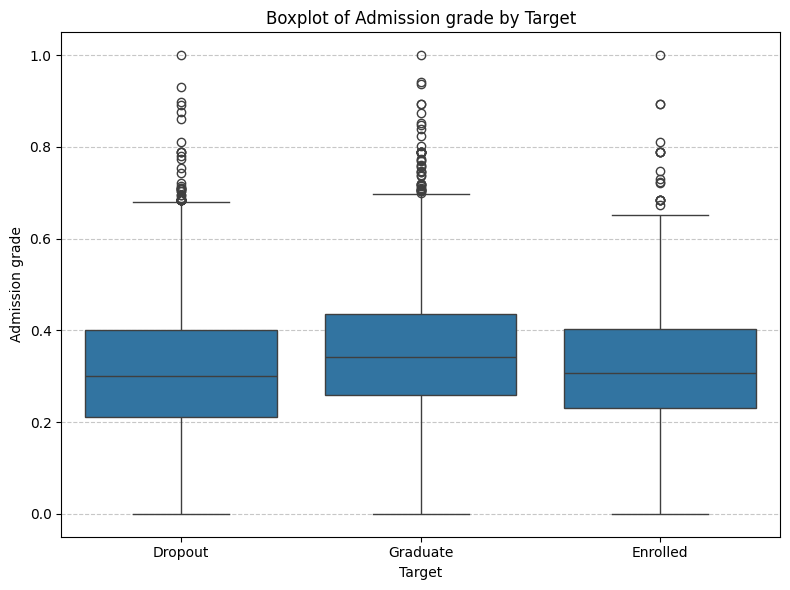

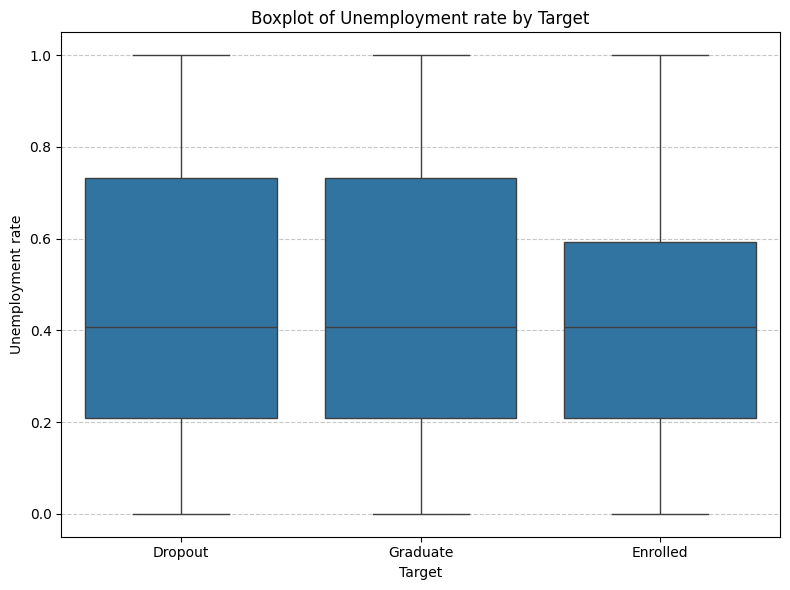

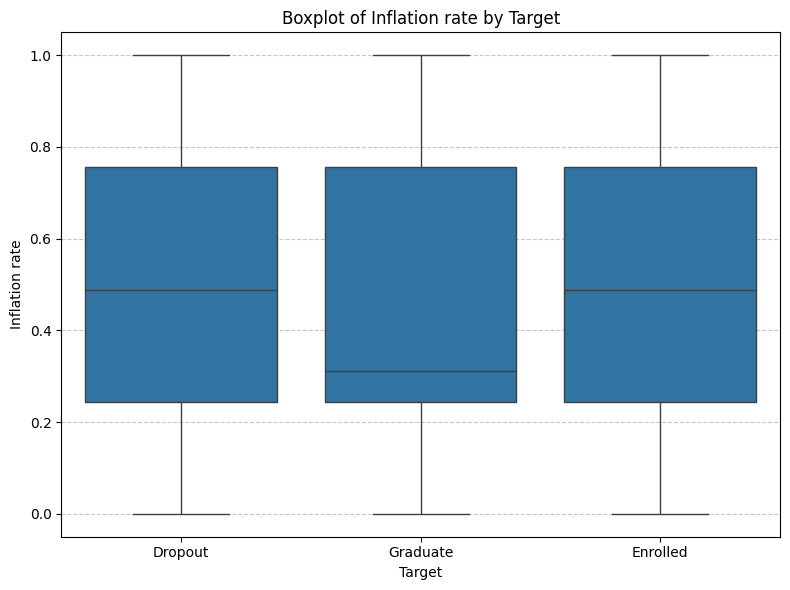

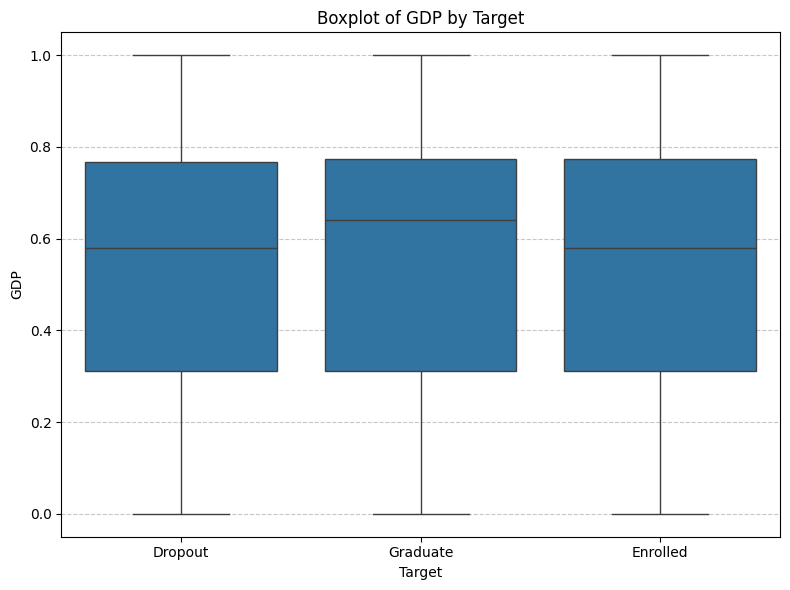

In [159]:
for col in boxplot_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Target', y=col, data=df_minmax)
    plt.title(f'Boxplot of {col} by Target')
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Biểu đồ dữ liệu một số cột sau khi áp dụng MinMaxScaler

### StandardScaler

In [160]:
# create a copy of df_raw and apply StandardScaler to quantitative columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standard = df_raw[quantitative_cols + ['Target']].copy()
df_standard[quantitative_cols] = scaler.fit_transform(df_standard[quantitative_cols])
df_standard

,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Curricular units Year,Curricular grade Year,Curricular units failed Year,Target
0,-0.430363,-0.300813,-2.528560,-1.986068,-1.521257,-0.199273,-0.282442,-2.838337,-2.042630,-1.471527,-0.199441,-0.804841,0.022229,-2.197102,-1.963489,-0.287638,0.124386,0.765761,-1.533977,-2.165950,-0.850512,Dropout
1,-0.562168,-0.300813,-0.109105,-0.550192,0.418050,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,-0.199441,2.076819,1.071926,0.693599,0.659562,0.876222,-1.105222,0.347199,0.479467,0.705237,-0.850512,Graduate
2,-0.562168,-0.300813,-0.109105,-1.986068,-1.521257,-0.199273,-0.282442,-0.105726,-2.042630,-1.471527,-0.199441,-0.804841,-0.150419,-2.197102,-1.963489,-0.287638,0.124386,0.765761,-1.533977,-2.165950,2.186754,Dropout
3,-0.430363,-0.300813,-0.109105,-0.071567,0.418050,-0.199273,-0.282442,-0.105726,0.490616,0.187165,-0.199441,-0.804841,-0.509526,0.575611,0.416450,-0.813253,-1.466871,-1.375511,0.311680,0.514483,-0.597407,Graduate
4,2.864765,-0.300813,-0.109105,0.167746,0.094832,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,-0.199441,-2.473171,1.002867,0.349468,0.531608,0.876222,-1.105222,0.347199,0.311680,0.463088,-0.597407,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.562168,-0.300813,-0.109105,-0.310879,0.094832,-0.199273,-0.282442,-0.105726,-0.016033,0.187165,-0.199441,-0.577342,-0.329972,0.611007,0.467631,1.476924,1.137005,-1.789667,0.143893,0.559948,-0.344301,Graduate
4420,-0.693973,-0.300813,-0.109105,-0.550192,0.418050,-0.199273,-0.282442,-0.105726,-0.522682,-0.808050,-0.199441,-0.956508,-0.550961,0.280641,0.147747,-0.175007,-0.454253,0.889126,-0.191681,0.220940,0.161910,Dropout
4421,0.887688,-0.300813,0.294137,-0.071567,0.741268,-0.199273,-0.282442,0.805144,0.237291,-1.139788,-0.199441,1.621820,1.555339,0.882010,0.627573,0.876222,-1.105222,0.347199,-0.191681,0.782638,0.921226,Dropout
4422,-0.430363,-0.300813,-0.512348,-0.789505,0.094832,-0.199273,-0.282442,-0.561161,-0.522682,0.187165,-0.199441,3.593483,1.852293,0.652303,0.339678,-0.813253,-1.466871,-1.375511,0.143893,0.511518,-0.850512,Graduate


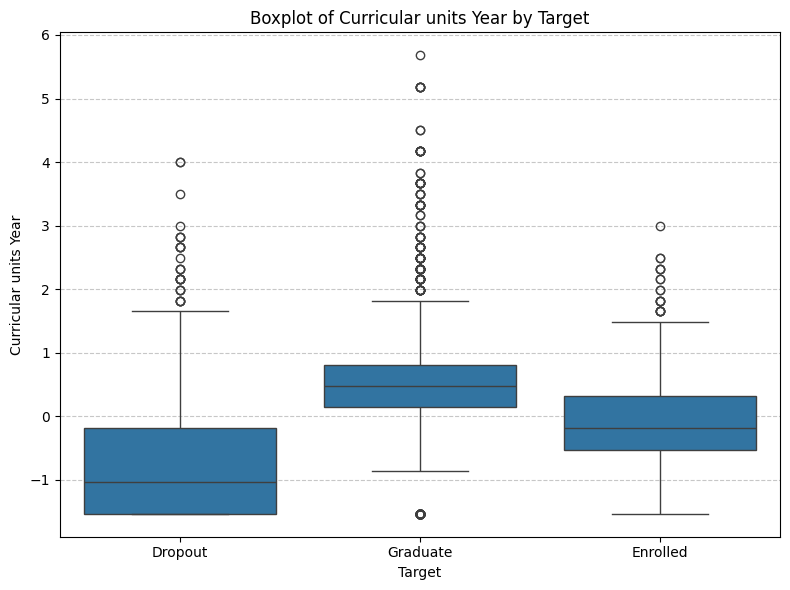

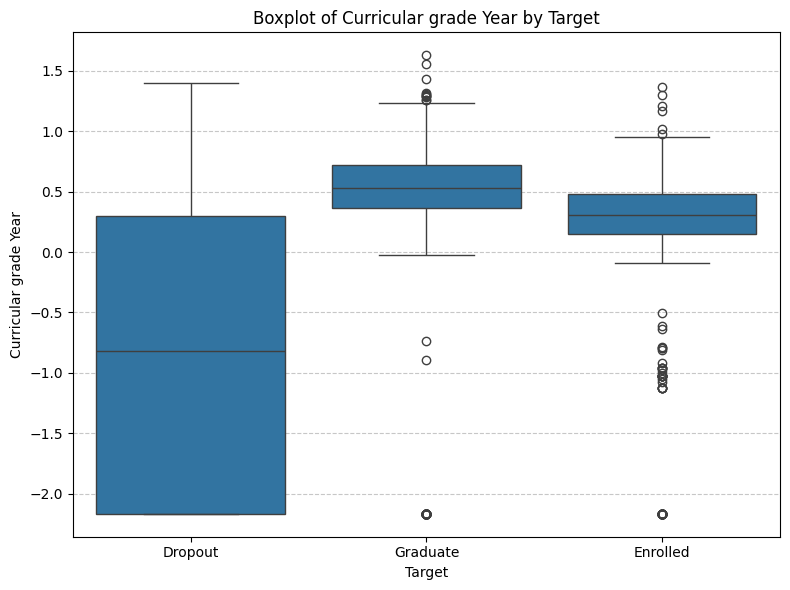

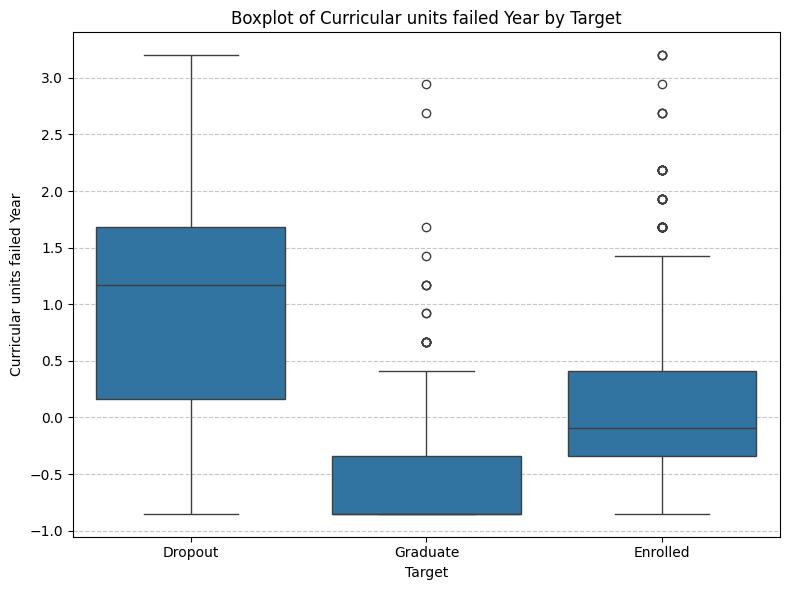

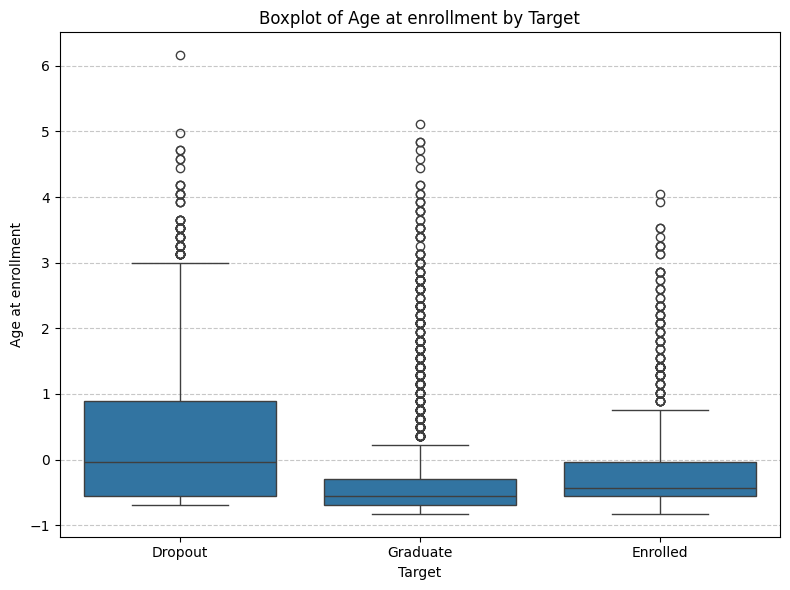

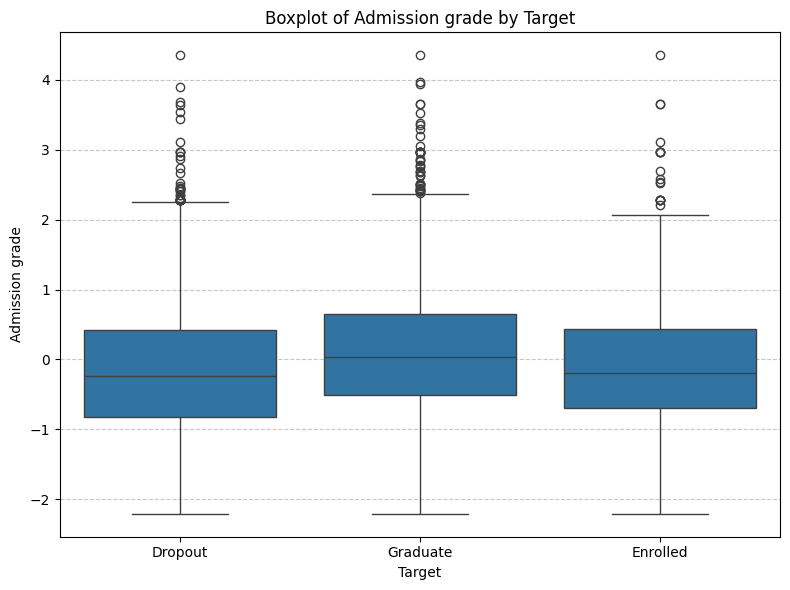

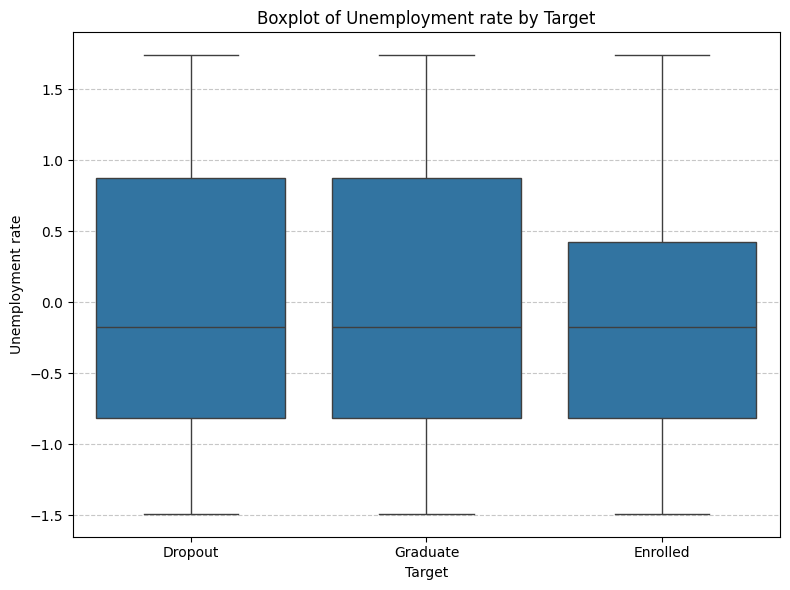

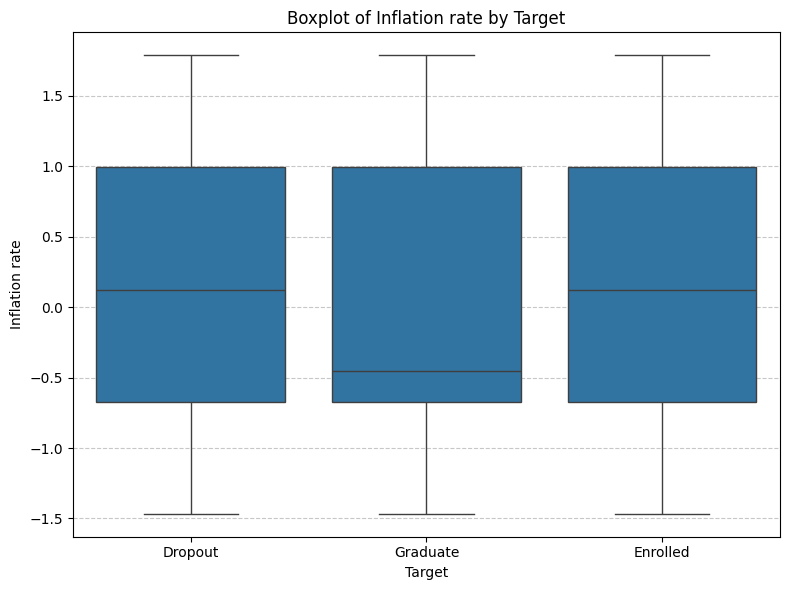

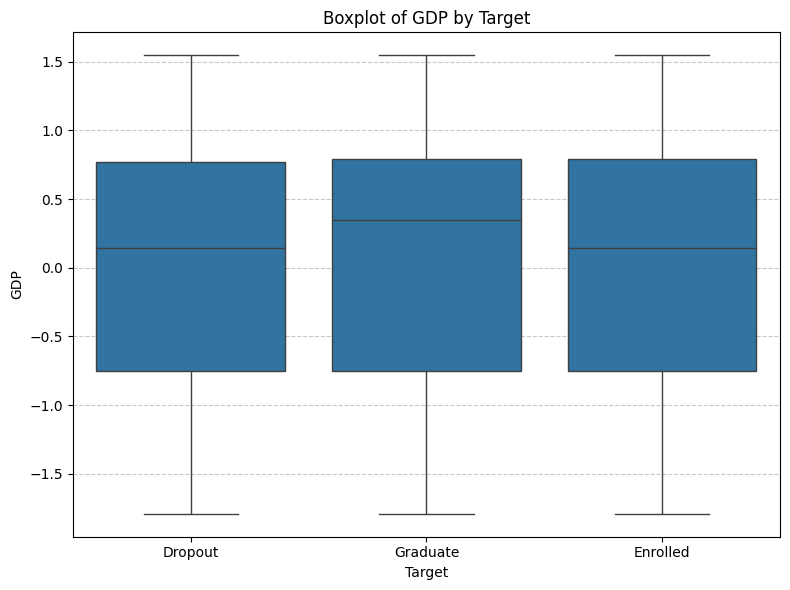

In [163]:
for col in boxplot_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Target', y=col, data=df_standard)
    plt.title(f'Boxplot of {col} by Target')
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

### RobustScaler

In [164]:
# Copy of df_raw and apply RobustScaler to quantitative columns
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust = df_raw[quantitative_cols + ['Target']].copy()
df_robust[quantitative_cols] = scaler.fit_transform(df_robust[quantitative_cols])
df_robust

,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Curricular units Year,Curricular grade Year,Curricular units failed Year,Target
0,0.000000,0.0,-3.0,-2.00,-1.666667,0.0,0.0,-3.0,-2.00,-1.25,0.0,-0.740000,0.071006,-5.119048,-4.722581,-0.066667,0.000000,0.406877,-1.428571,-5.404412,-0.4,Dropout
1,-0.166667,0.0,0.0,-0.50,0.333333,0.0,0.0,0.0,-0.50,0.25,0.0,1.793333,0.970414,0.714286,0.567742,0.622222,-0.739130,0.134670,0.285714,0.698529,-0.4,Graduate
2,-0.166667,0.0,0.0,-2.00,-1.666667,0.0,0.0,0.0,-2.00,-1.25,0.0,-0.740000,-0.076923,-5.119048,-4.722581,-0.066667,0.000000,0.406877,-1.428571,-5.404412,2.0,Dropout
3,0.000000,0.0,0.0,0.00,0.333333,0.0,0.0,0.0,0.50,0.00,0.0,-0.740000,-0.384615,0.476190,0.077419,-0.377778,-0.956522,-0.985673,0.142857,0.293067,-0.2,Graduate
4,4.166667,0.0,0.0,0.25,0.000000,0.0,0.0,0.0,-0.50,0.25,0.0,-2.206667,0.911243,0.019841,0.309677,0.622222,-0.739130,0.134670,0.142857,0.183824,-0.2,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.166667,0.0,0.0,-0.25,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,-0.540000,-0.230769,0.547619,0.180645,0.977778,0.608696,-1.255014,0.000000,0.389706,0.0,Graduate
4420,-0.333333,0.0,0.0,-0.50,0.333333,0.0,0.0,0.0,-0.50,-0.75,0.0,-0.873333,-0.420118,-0.119048,-0.464516,0.000000,-0.347826,0.487106,-0.285714,-0.330882,0.4,Dropout
4421,1.666667,0.0,0.5,0.00,0.666667,0.0,0.0,1.0,0.25,-1.00,0.0,1.393333,1.384615,1.094494,0.503226,0.622222,-0.739130,0.134670,-0.285714,0.863051,1.0,Dropout
4422,0.000000,0.0,-0.5,-0.75,0.000000,0.0,0.0,-0.5,-0.50,0.00,0.0,3.126667,1.639053,0.630952,-0.077419,-0.377778,-0.956522,-0.985673,0.000000,0.286765,-0.4,Graduate


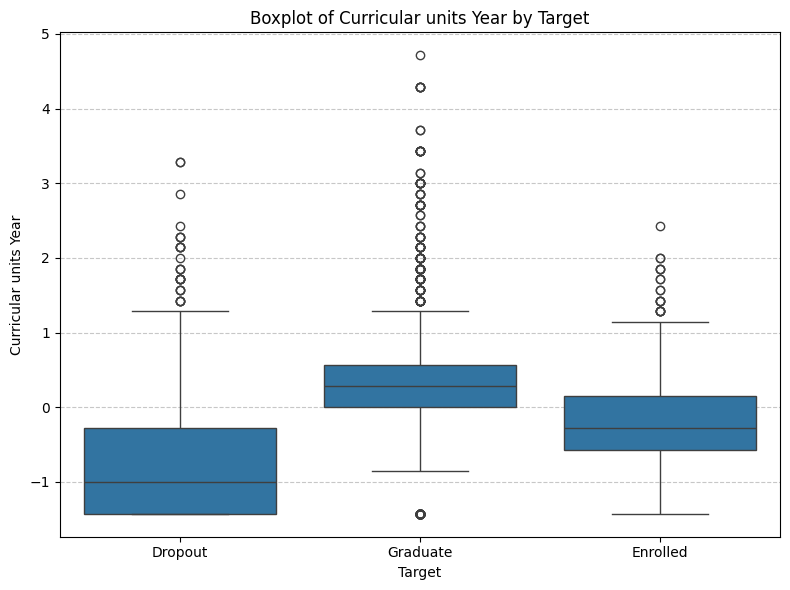

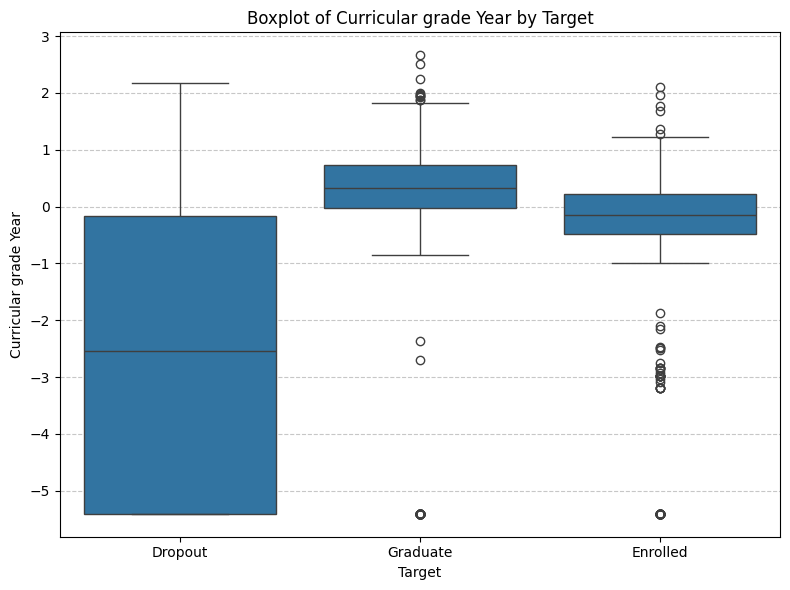

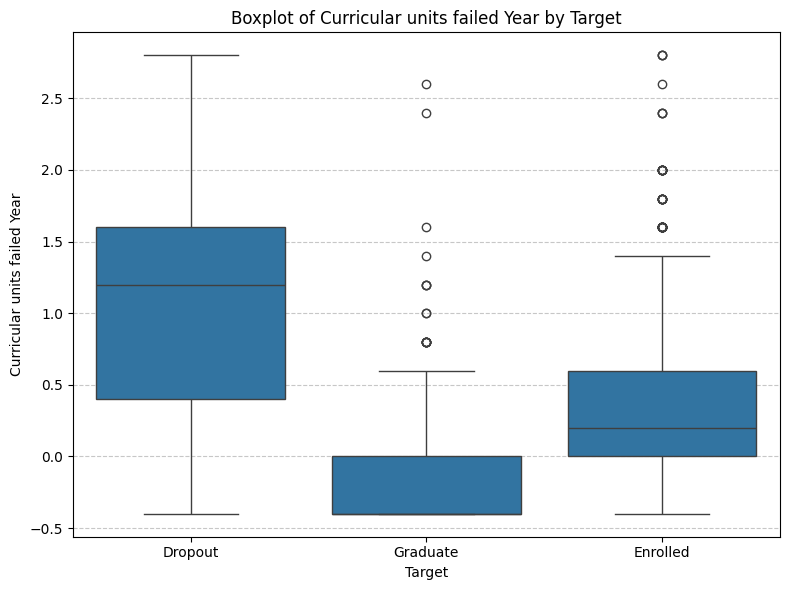

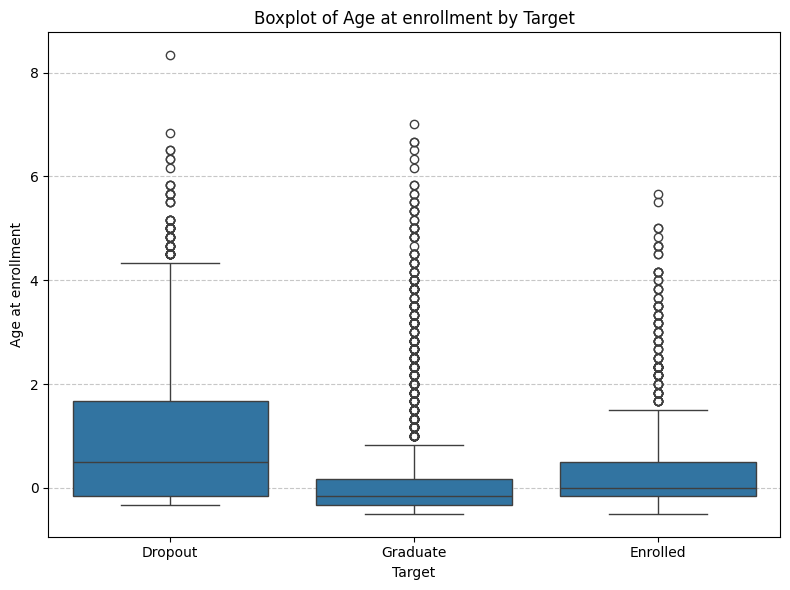

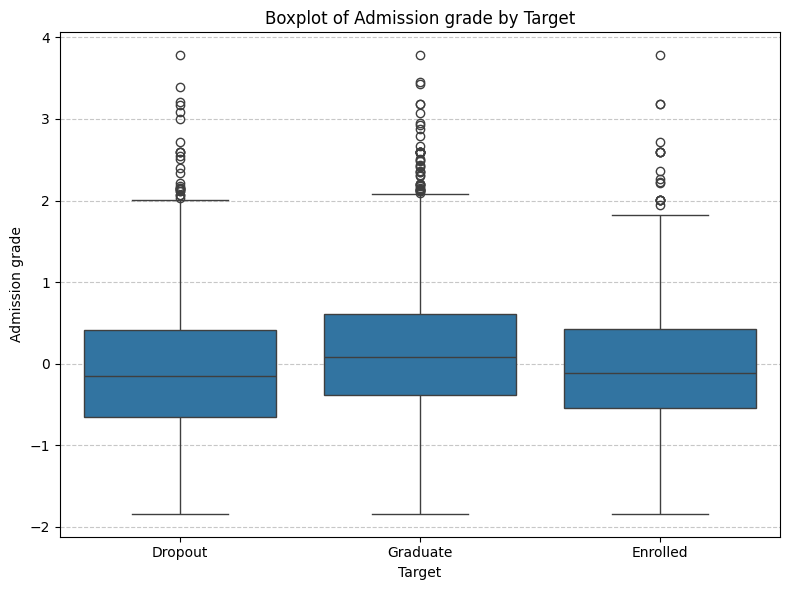

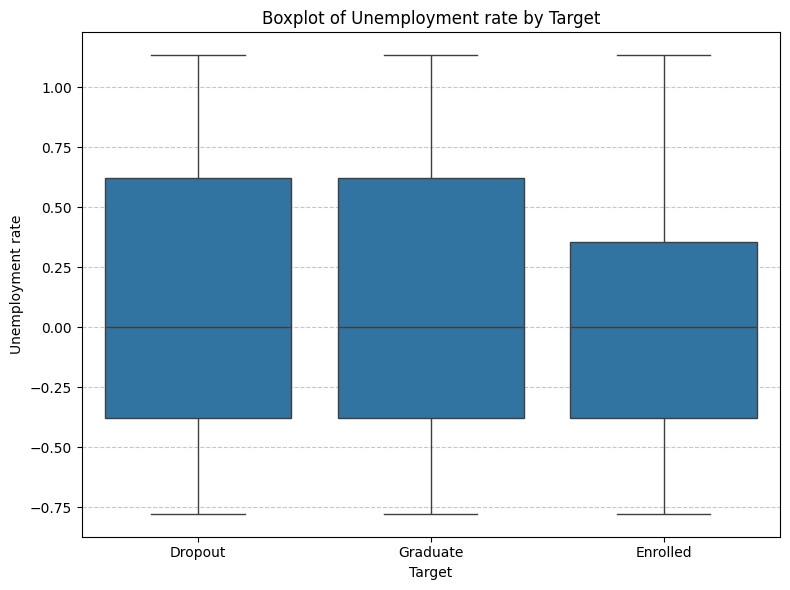

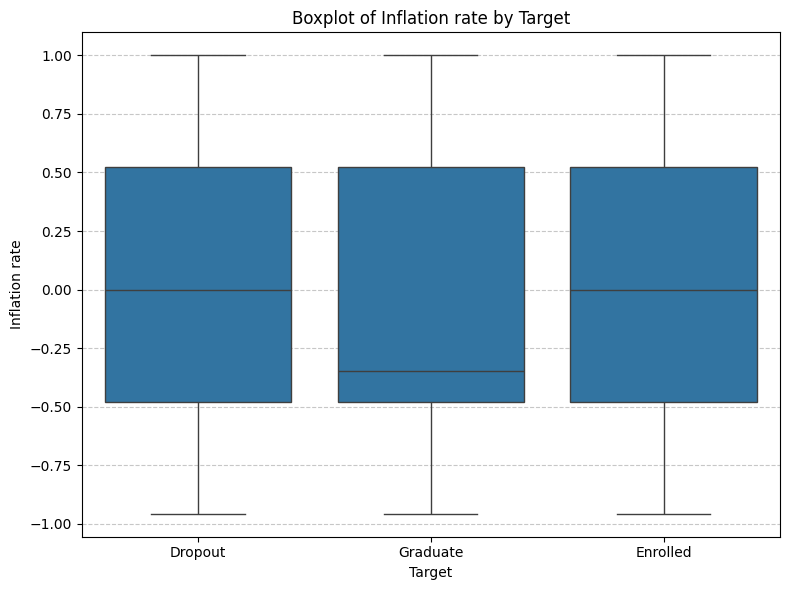

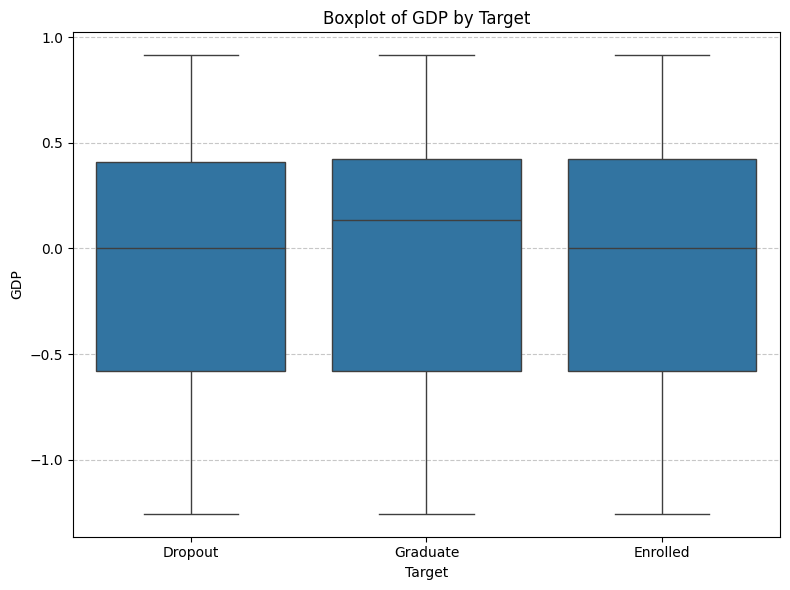

In [166]:
for col in boxplot_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Target', y=col, data=df_robust)
    plt.title(f'Boxplot of {col} by Target')
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

### MaxAbsScaler

In [167]:
# Copy of df_raw and apply MaxAbsScaler to quantitative columns
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
df_maxabs = df_raw[quantitative_cols + ['Target']].copy()
df_maxabs[quantitative_cols] = scaler.fit_transform(df_maxabs[quantitative_cols])
df_maxabs


,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Curricular units Year,Curricular grade Year,Curricular units failed Year,Target
0,0.285714,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.642105,0.670000,0.000000,0.000000,0.666667,0.378378,0.428571,0.000000,0.000000,0.0000,Dropout
1,0.271429,0.0,0.230769,0.133333,0.230769,0.0,0.0,0.260870,0.181818,0.30,0.0,0.842105,0.750000,0.741722,0.735897,0.858025,-0.081081,0.194581,0.279070,0.756596,0.0000,Graduate
2,0.271429,0.0,0.230769,0.000000,0.000000,0.0,0.0,0.260870,0.000000,0.00,0.0,0.642105,0.656842,0.000000,0.000000,0.666667,0.378378,0.428571,0.000000,0.000000,0.7500,Dropout
3,0.285714,0.0,0.230769,0.177778,0.230769,0.0,0.0,0.260870,0.303030,0.25,0.0,0.642105,0.629474,0.711447,0.667692,0.580247,-0.216216,-0.768473,0.255814,0.706330,0.0625,Graduate
4,0.642857,0.0,0.230769,0.200000,0.192308,0.0,0.0,0.260870,0.181818,0.30,0.0,0.526316,0.744737,0.653422,0.700000,0.858025,-0.081081,0.194581,0.255814,0.692786,0.0625,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.271429,0.0,0.230769,0.155556,0.192308,0.0,0.0,0.260870,0.242424,0.25,0.0,0.657895,0.643158,0.720530,0.682051,0.956790,0.756757,-1.000000,0.232558,0.718310,0.1250,Graduate
4420,0.257143,0.0,0.230769,0.133333,0.230769,0.0,0.0,0.260870,0.181818,0.10,0.0,0.631579,0.626316,0.635762,0.592308,0.685185,0.162162,0.497537,0.186047,0.628977,0.2500,Dropout
4421,0.428571,0.0,0.269231,0.177778,0.269231,0.0,0.0,0.347826,0.272727,0.05,0.0,0.810526,0.786842,0.790066,0.726923,0.858025,-0.081081,0.194581,0.186047,0.776992,0.4375,Dropout
4422,0.285714,0.0,0.192308,0.111111,0.192308,0.0,0.0,0.217391,0.181818,0.25,0.0,0.947368,0.809474,0.731126,0.646154,0.580247,-0.216216,-0.768473,0.232558,0.705548,0.0000,Graduate


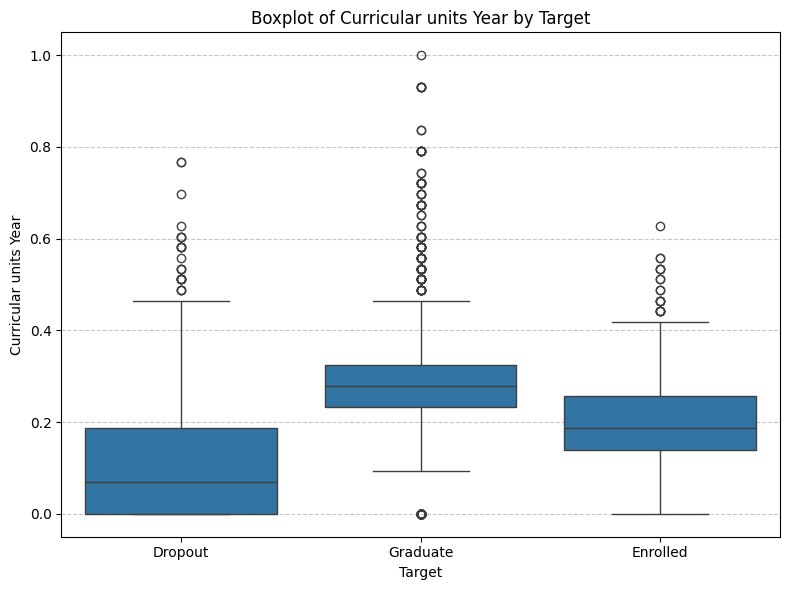

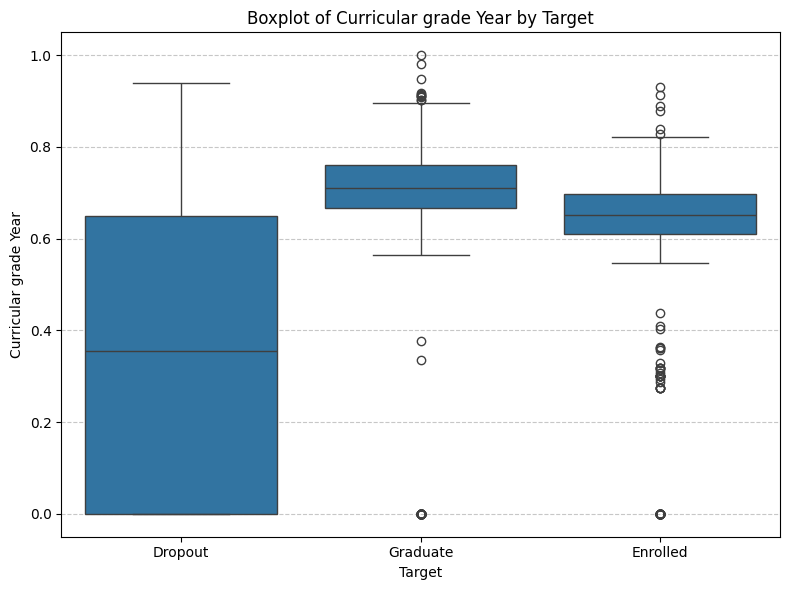

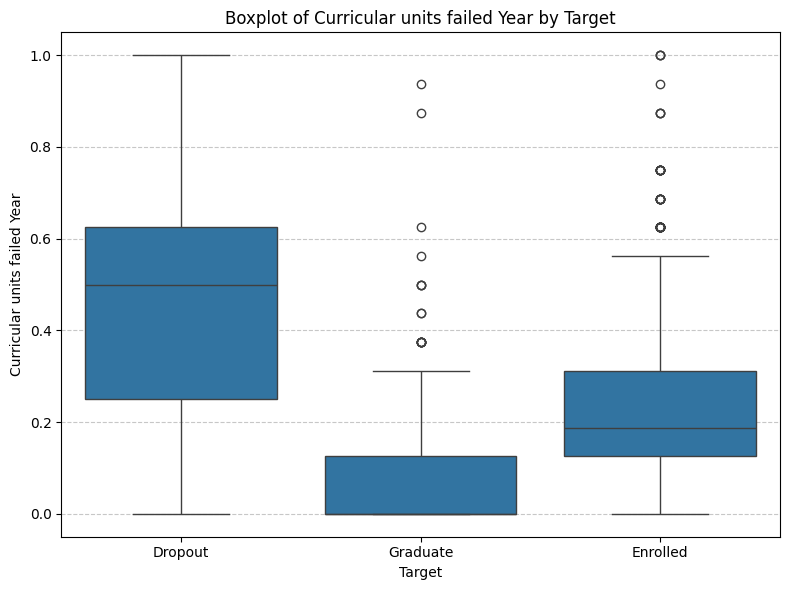

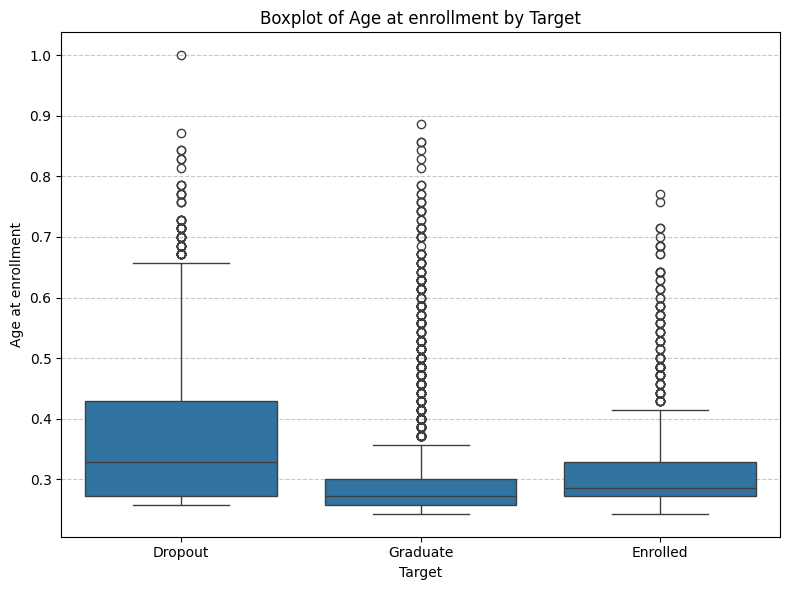

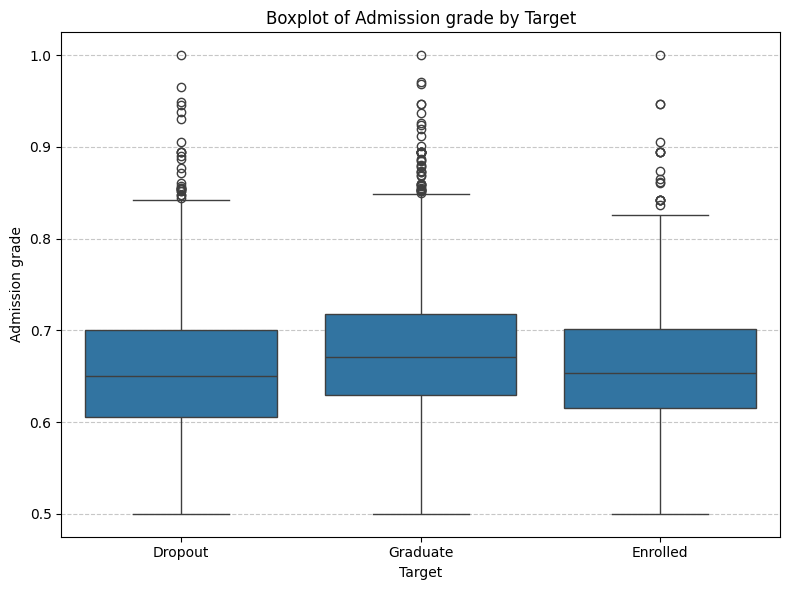

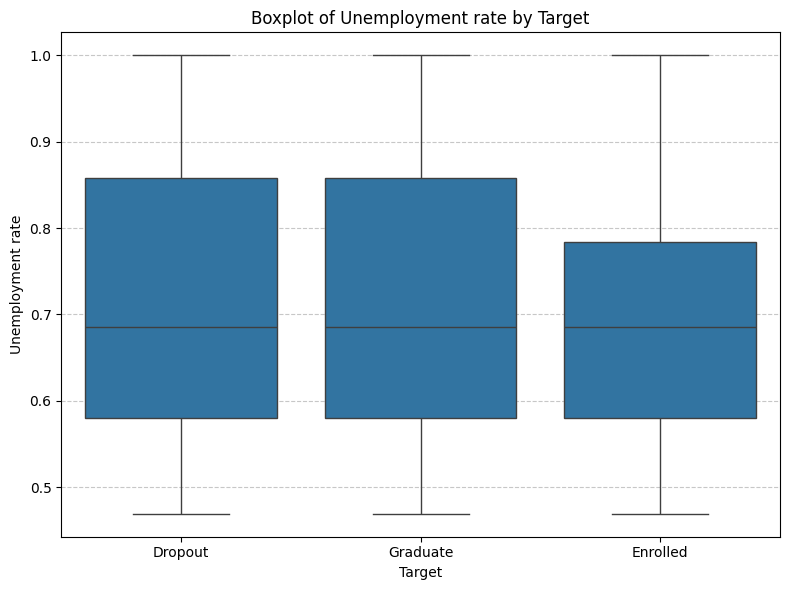

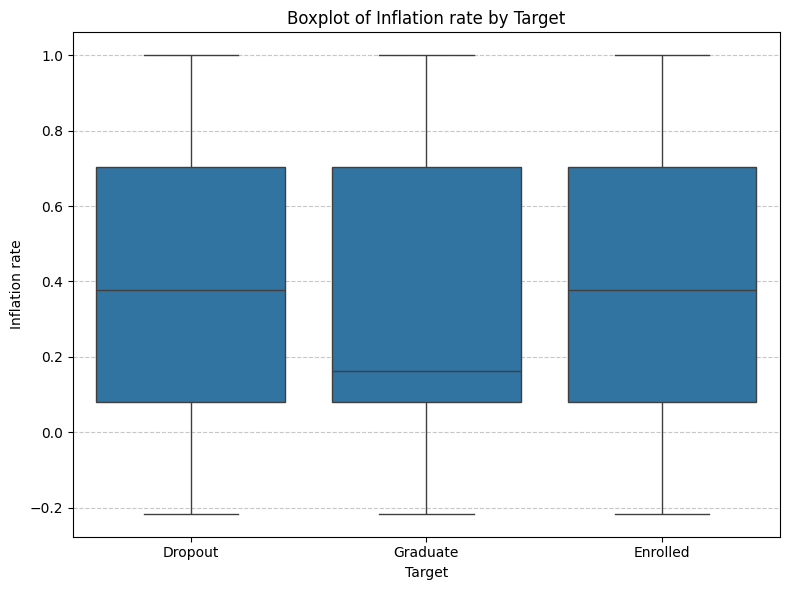

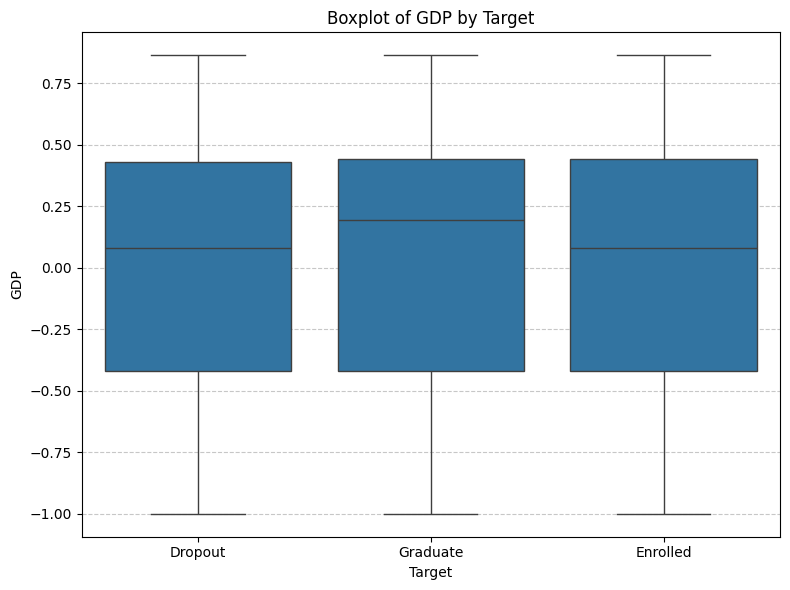

In [168]:
for col in boxplot_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Target', y=col, data=df_maxabs)
    plt.title(f'Boxplot of {col} by Target')
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

### QuantileTransformer

In [169]:
# Create a copy of df_raw and apply PowerTransformer to quantitative columns
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
df_power = df_raw[quantitative_cols + ['Target']].copy()
df_power[quantitative_cols] = scaler.fit_transform(df_power[quantitative_cols])
df_power

,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Curricular units Year,Curricular grade Year,Curricular units failed Year,Target
0,-0.226299,-0.387227,-2.997413,-2.254687,-1.712471,-0.266808,-0.368907,-2.939873,-2.140754,-1.591908,-0.260927,-0.794537,0.102617,-2.074367,-1.902454,-0.213707,0.226305,0.741806,-1.722002,-2.054854,-1.208187,Dropout
1,-0.635746,-0.387227,-0.065206,-0.504255,0.484731,-0.266808,-0.368907,-0.095537,-0.498405,0.565695,-0.260927,1.975453,1.079025,0.823763,0.712547,0.896070,-1.138875,0.221239,0.536422,0.779729,-1.208187,Graduate
2,-0.635746,-0.387227,-0.065206,-2.254687,-1.712471,-0.266808,-0.368907,-0.095537,-2.140754,-1.591908,-0.260927,-0.794537,-0.073881,-2.074367,-1.902454,-0.213707,0.226305,0.741806,-1.722002,-2.054854,1.539625,Dropout
3,-0.226299,-0.387227,-0.065206,-0.017067,0.484731,-0.266808,-0.368907,-0.095537,0.503847,0.263542,-0.260927,-0.794537,-0.457570,0.626468,0.365457,-0.787397,-1.660781,-1.294669,0.386793,0.515227,-0.345424,Graduate
4,1.799943,-0.387227,-0.065206,0.217520,0.184843,-0.266808,-0.368907,-0.095537,-0.498405,0.565695,-0.260927,-2.702268,1.019402,0.265583,0.527718,0.896070,-1.138875,0.221239,0.386793,0.445375,-0.345424,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.635746,-0.387227,-0.065206,-0.257363,0.184843,-0.266808,-0.368907,-0.095537,0.008058,0.263542,-0.260927,-0.554451,-0.262834,0.685012,0.437090,1.402631,1.107005,-1.583591,0.233575,0.577524,0.114612,Graduate
4420,-1.150201,-0.387227,-0.065206,-0.504255,0.484731,-0.266808,-0.368907,-0.095537,-0.498405,-0.745059,-0.260927,-0.957009,-0.503362,0.160295,0.002353,-0.097429,-0.353668,0.904858,-0.085431,0.124584,0.651325,Dropout
4421,1.392754,-0.387227,0.336258,-0.017067,0.771543,-0.266808,-0.368907,0.807215,0.257132,-1.138083,-0.260927,1.572800,1.480386,1.151476,0.665897,0.896070,-1.138875,0.221239,-0.085431,0.889363,1.106081,Dropout
4422,-0.226299,-0.387227,-0.481488,-0.758911,0.184843,-0.266808,-0.368907,-0.552543,-0.498405,0.263542,-0.260927,3.242278,1.713956,0.754012,0.259472,-0.787397,-1.660781,-1.294669,0.233575,0.511181,-1.208187,Graduate


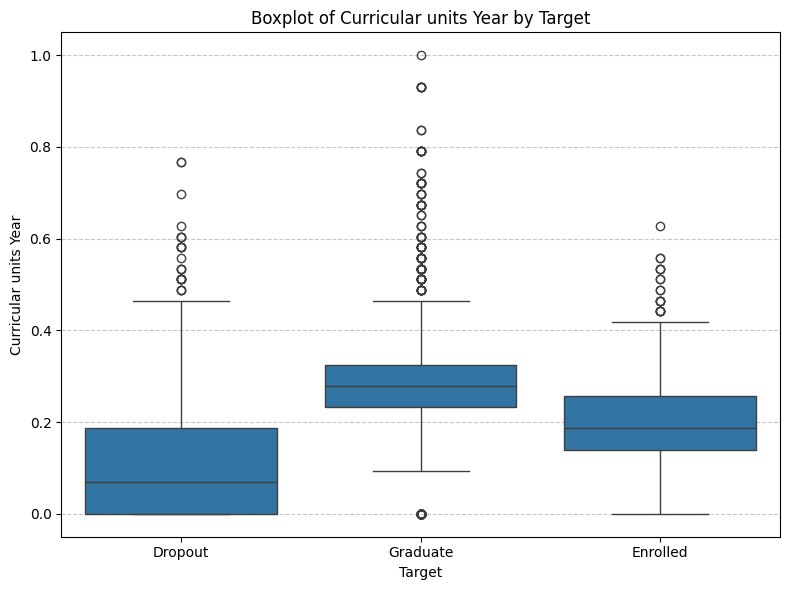

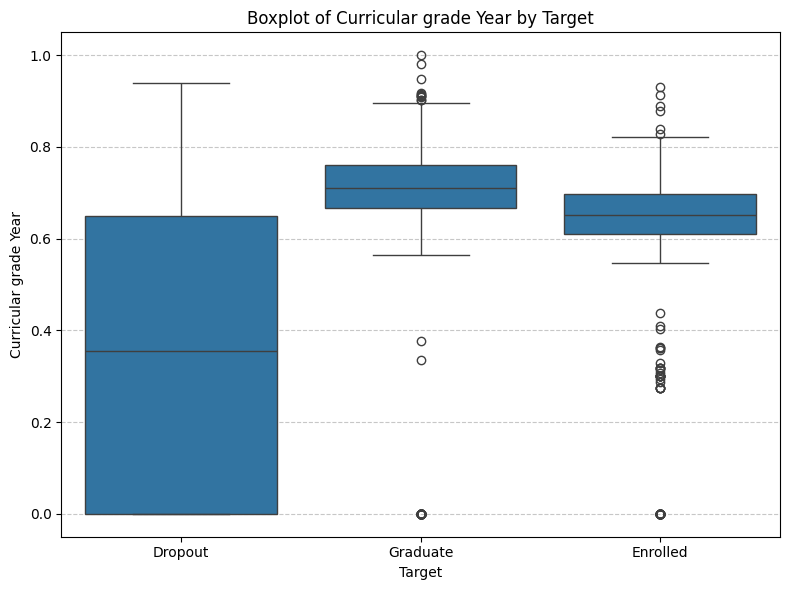

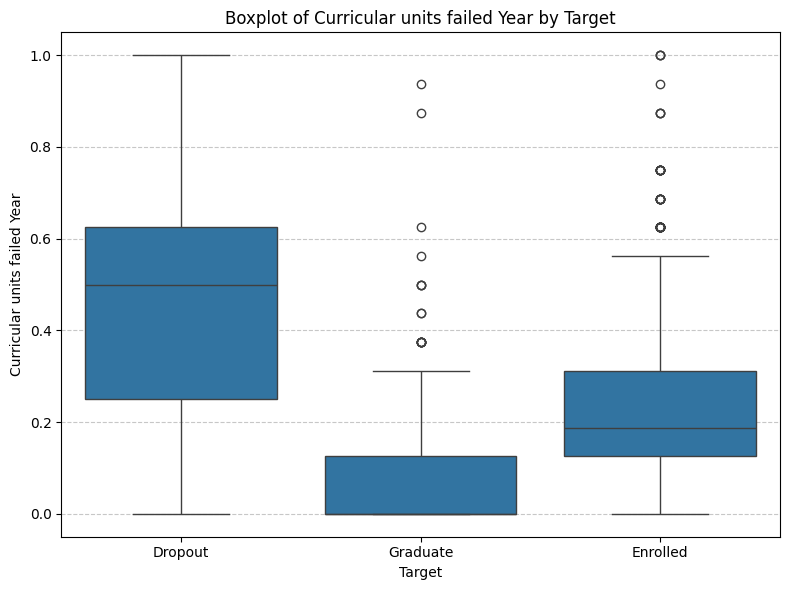

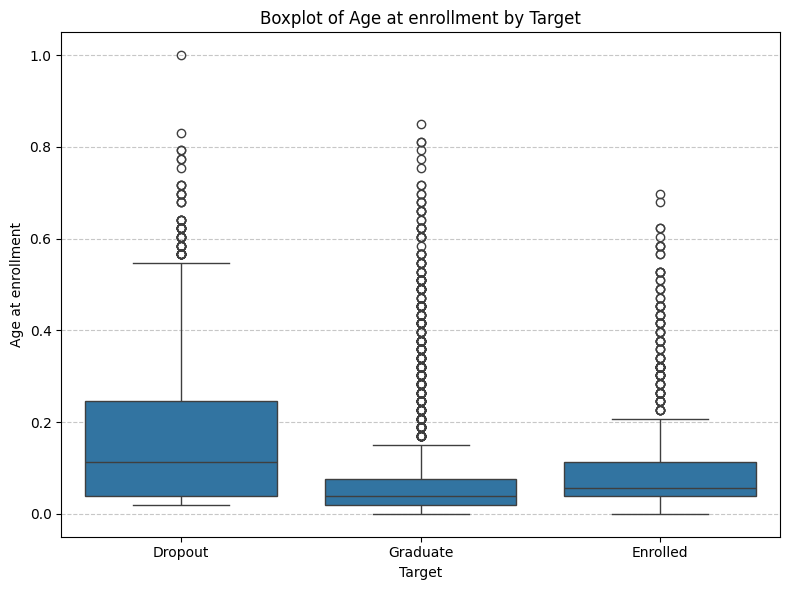

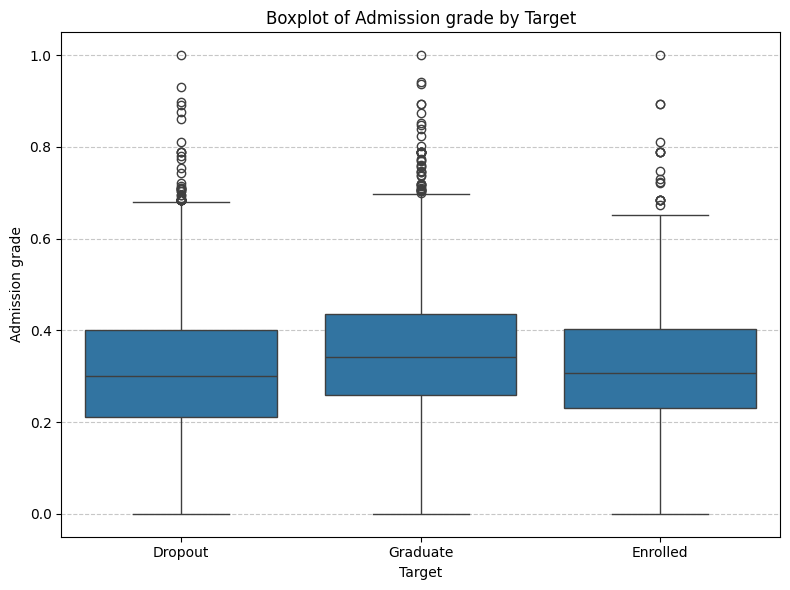

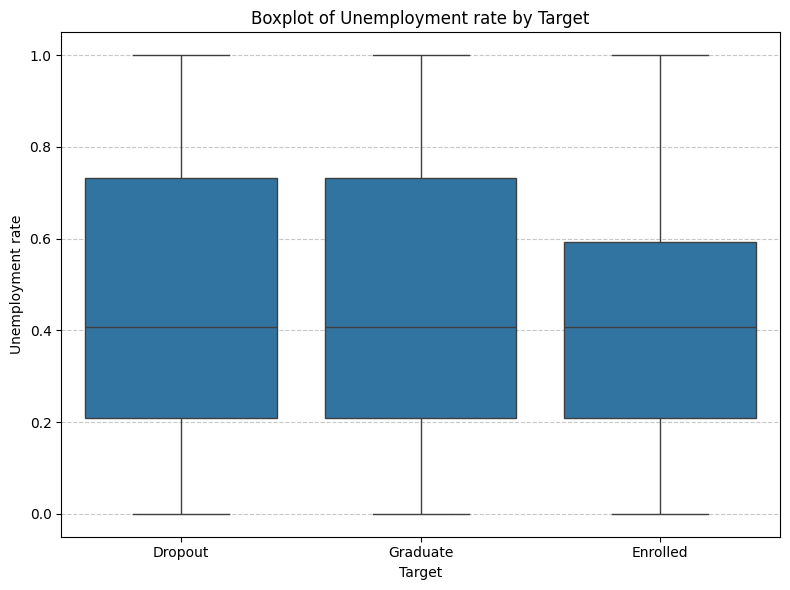

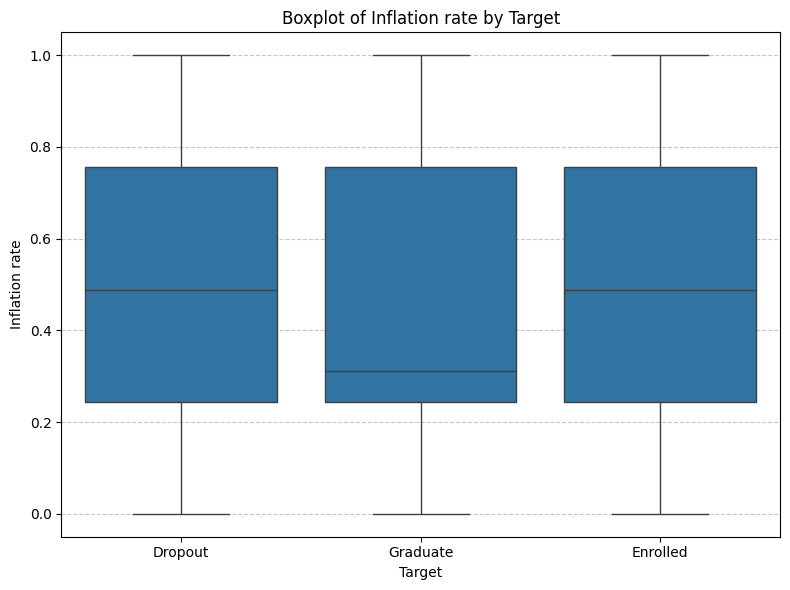

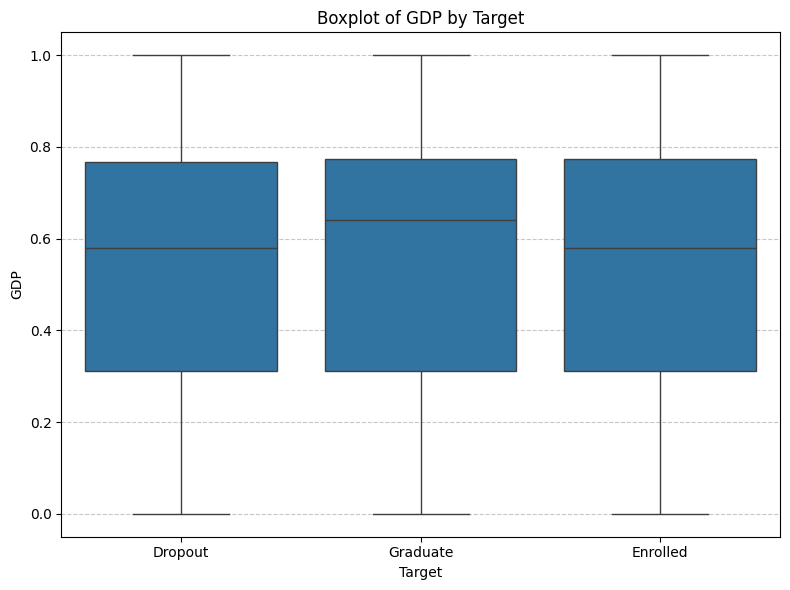

In [170]:
for col in boxplot_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Target', y=col, data=df_minmax)
    plt.title(f'Boxplot of {col} by Target')
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()